In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [2]:
print('pandas version', pd.__version__)
print('numpy version', np.__version__)
print('seaborn version', sns.__version__)
print('matplotlib version', matplotlib.__version__)

pandas version 1.5.3
numpy version 1.23.5
seaborn version 0.12.2
matplotlib version 3.7.0


# Census Data

In [3]:
census = pd.read_csv("C:\\Users\\ksaip\\Futurense Training\\Projects\Health Care\\DS - Python + SQL + ETL - Healthcare Census\\Data\\census_2011.csv")

In [4]:
census.head()

,District code,State name,District name,Population,Male,Female,Literate,Male_Literate,Female_Literate,SC,...,Power_Parity_Rs_90000_150000,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Total_Power_Parity
0,1,JAMMU AND KASHMIR,Kupwara,870354.0,474190.0,396164.0,439654.0,282823.0,156831.0,1048.0,...,94.0,588.0,71.0,101.0,172.0,74.0,10.0,84.0,15.0,1119.0
1,2,JAMMU AND KASHMIR,Badgam,753745.0,NaN,355704.0,335649.0,207741.0,127908.0,NaN,...,126.0,562.0,72.0,89.0,161.0,96.0,28.0,124.0,18.0,1066.0
2,3,JAMMU AND KASHMIR,Leh(Ladakh),133487.0,78971.0,54516.0,93770.0,62834.0,30936.0,488.0,...,46.0,122.0,15.0,22.0,NaN,20.0,NaN,NaN,17.0,242.0
3,4,JAMMU AND KASHMIR,Kargil,140802.0,NaN,63017.0,NaN,56301.0,29935.0,18.0,...,27.0,114.0,12.0,18.0,30.0,19.0,3.0,22.0,7.0,214.0
4,5,JAMMU AND KASHMIR,Punch,NaN,251899.0,224936.0,261724.0,163333.0,98391.0,556.0,...,78.0,346.0,35.0,50.0,85.0,59.0,8.0,67.0,12.0,629.0


- There are many columns (118). Out of these 118 columns we need to find out the necessary columns 

In [5]:
census.shape

(640, 118)

In [6]:
census.isnull().sum()

District code                     0
State name                        0
District name                     0
Population                       30
Male                             30
                                 ..
Power_Parity_Rs_330000_425000    33
Power_Parity_Rs_425000_545000    30
Power_Parity_Rs_330000_545000    23
Power_Parity_Above_Rs_545000     30
Total_Power_Parity               32
Length: 118, dtype: int64

In [7]:
census.isnull().sum().sum()

3622

In [8]:
# There are 3622 cells having null values

### 1. Keep the relevant data
- State name, District name, Population, Male, Female, Literate, Male_Literate, Female_Literate, Rural_Households, Urban_Households, Households, Age_Group_0_29, Age_Group_30_49, Age_Group_50, Age not stated


In [9]:
#Let us keep the necessary columns

In [10]:
census = census[['State name', 'District name', 'Population','Male','Female','Literate', 'Male_Literate','Female_Literate','Rural_Households','Urban_Households','Households','Age_Group_0_29','Age_Group_30_49','Age_Group_50','Age not stated']]

In [11]:
census.head()

,State name,District name,Population,Male,Female,Literate,Male_Literate,Female_Literate,Rural_Households,Urban_Households,Households,Age_Group_0_29,Age_Group_30_49,Age_Group_50,Age not stated
0,JAMMU AND KASHMIR,Kupwara,870354.0,474190.0,396164.0,439654.0,282823.0,156831.0,158438.0,NaN,181664.0,600759.0,178435.0,89679.0,1481.0
1,JAMMU AND KASHMIR,Badgam,753745.0,NaN,355704.0,335649.0,207741.0,127908.0,160649.0,27190.0,187839.0,503223.0,160933.0,88978.0,611.0
2,JAMMU AND KASHMIR,Leh(Ladakh),133487.0,78971.0,54516.0,93770.0,62834.0,30936.0,36920.0,17474.0,54394.0,70703.0,41515.0,NaN,250.0
3,JAMMU AND KASHMIR,Kargil,140802.0,NaN,63017.0,NaN,56301.0,29935.0,40370.0,7774.0,48144.0,87532.0,35561.0,17488.0,221.0
4,JAMMU AND KASHMIR,Punch,NaN,251899.0,224936.0,261724.0,163333.0,98391.0,132139.0,15269.0,147408.0,304979.0,109818.0,61334.0,704.0


In [12]:
census.shape

(640, 15)

### 2. Rename the column names
- State name  to State/UT, District name  to District, Male_Literate to Literate_Male, Female_Literate to Literate_Female, Rural_Households  to Households_Rural, Urban_Households  to Households_Urban, Age_Group_0_29 to Young_and_Adult, Age_Group_30_49 to Middle_Aged, Age_Group_50 to Senior_Citizen, Age not stated to Age_Not_Stated

In [13]:
census.rename(columns = {'State name' : 'State/UT', 'District name':'District', 'Male_Literate' : 'Literate_Male', 'Female_Literate':'Literate_Female','Rural_Households':'Households_Rural', 'Urban_Households' : 'Households_Urban', 'Age_Group_0_29' : 'Young_and_Adult', 'Age_Group_30_49' : 'Middle_Aged', 'Age_Group_50' :'Senior_Citizen', 'Age not stated':'Age_Not_Stated'}, inplace = True)

In [14]:
census['State/UT'] = census['State/UT'].apply(lambda x: ' '.join(w.lower() if w.lower() == 'and' else w.capitalize() for w in x.split()))


- Some State/UT may be referred to as different spelling in different files, for example
- PONDICHERRY – Puducherry
- ORISSA – Odisha
- NCT OF DELHI – Delhi


In [15]:
census.loc[census['State/UT']=='Pondicherry', 'State/UT'] = 'Puducherry'
census.loc[census['State/UT'] == 'Orissa', 'State/UT'] = 'Odisha'
census.loc[census['State/UT']== 'Nct Of Delhi', 'State/UT'] = 'Delhi'

### 3. Update districts under new states
- Telangana(2014) from Andhra Pradesh : Adilabad, Nizamabad, Karimnagar, Medak, Hyderabad, Rangareddy, Mahbubnagar, Nalgonda, Warangal,Khammam
- Ladakh(2019) from Jammu and Kashmir : Leh and Kargil
- Rename the State/UT for these districts

In [16]:
ts_districts = ['Adilabad', 'Nizamabad', 'Karimnagar', 'Medak', 'Hyderabad', 'Rangareddy', 'Mahbubnagar', 'Nalgonda', 'Warangal','Khammam']
census.loc[census['District'].isin(ts_districts), 'State/UT'] = 'Telangana'

In [17]:
ladakh_districts = ['Leh(Ladakh)', 'Kargil']
census.loc[census['District'].isin(ladakh_districts), 'State/UT'] = 'Ladakh'

In [18]:
census[census['State/UT'] == 'Telangana']['District']

531       Adilabad
532      Nizamabad
533     Karimnagar
534          Medak
535      Hyderabad
536     Rangareddy
537    Mahbubnagar
538       Nalgonda
539       Warangal
540        Khammam
Name: District, dtype: object

In [19]:
census[census['State/UT'] == 'Ladakh']['District']

2    Leh(Ladakh)
3         Kargil
Name: District, dtype: object

### 5. Find and store the percentage of data missing for each column.
- Some data can be found and filled in by using information from other cells. Try to find the correct data by using information from other cells and filling it in
- Hint:
- Population = Male + Female
- Literate = Literate_Male + Literate_Female
- Population  = Young_and_Adult+  Middle_Aged + Senior_Citizen + Age_Not_Stated
- Households = Households_Rural + Households_Urban 
- Create a visualization that compares the amount of missing data before and after the data-filling process was done. 

In [20]:
missing_percents_before = (census.isnull().sum()/ len(census)) * 100

In [21]:
missing_percents_before

State/UT            0.00000
District            0.00000
Population          4.68750
Male                4.68750
Female              5.15625
Literate            5.62500
Literate_Male       4.84375
Literate_Female     4.21875
Households_Rural    6.56250
Households_Urban    5.15625
Households          5.00000
Young_and_Adult     4.84375
Middle_Aged         4.68750
Senior_Citizen      4.84375
Age_Not_Stated      5.46875
dtype: float64

##### Fixing Population, Male, Female

In [22]:
temp = census[census['Population'].isnull()]

In [23]:
temp

,State/UT,District,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Households_Urban,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated
4,Jammu and Kashmir,Punch,NaN,251899.0,224936.0,261724.0,163333.0,98391.0,132139.0,15269.0,147408.0,304979.0,109818.0,61334.0,704.0
35,Punjab,Kapurthala,NaN,426311.0,388857.0,576567.0,316254.0,260313.0,165433.0,95770.0,261203.0,433331.0,222324.0,157833.0,1680.0
71,Haryana,Kurukshetra,NaN,510976.0,453679.0,646893.0,370828.0,276065.0,203553.0,88268.0,291821.0,552034.0,250830.0,160216.0,1575.0
74,Haryana,Panipat,NaN,646857.0,558580.0,786599.0,464136.0,322463.0,173502.0,153804.0,327306.0,739075.0,298764.0,167244.0,354.0
110,Rajasthan,Sikar,NaN,1374990.0,1302343.0,1652117.0,995275.0,656842.0,527560.0,178274.0,705834.0,1672813.0,605002.0,381226.0,18292.0
114,Rajasthan,Barmer,NaN,1369022.0,1234729.0,1188322.0,783461.0,404861.0,542825.0,55980.0,598805.0,1731122.0,527629.0,326476.0,18524.0
127,Rajasthan,Baran,NaN,633945.0,588810.0,693307.0,432607.0,260700.0,249184.0,69804.0,318988.0,762204.0,286344.0,173100.0,1107.0
131,Uttar Pradesh,Saharanpur,NaN,1834106.0,1632276.0,2077108.0,1220114.0,856994.0,605082.0,284156.0,889238.0,NaN,769736.0,433862.0,34095.0
150,Uttar Pradesh,Pilibhit,NaN,1072002.0,959005.0,1061095.0,654290.0,406805.0,371752.0,89638.0,NaN,1320476.0,449673.0,256276.0,4582.0
236,Bihar,Nawada,NaN,1144668.0,1074478.0,1091012.0,659474.0,431538.0,NaN,45323.0,424874.0,1440781.0,485628.0,288805.0,3932.0


In [24]:
census['Population'].isnull().sum()

30

In [25]:
census.loc[temp.index, 'Population'] = temp['Male'] + temp['Female']

In [26]:
census['Population'].isnull().sum()

1

In [27]:
temp = census[census['Male'].isnull()]

In [28]:
temp

,State/UT,District,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Households_Urban,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated
1,Jammu and Kashmir,Badgam,753745.0,NaN,355704.0,335649.0,207741.0,127908.0,160649.0,27190.0,187839.0,503223.0,160933.0,88978.0,611.0
3,Ladakh,Kargil,140802.0,NaN,63017.0,NaN,56301.0,29935.0,40370.0,7774.0,48144.0,87532.0,35561.0,17488.0,221.0
14,Jammu and Kashmir,Kulgam,424483.0,NaN,206863.0,209085.0,125052.0,84033.0,95952.0,25178.0,121130.0,266858.0,99870.0,57253.0,502.0
16,Jammu and Kashmir,Ramban,283713.0,NaN,134581.0,124065.0,82938.0,41127.0,84281.0,NaN,89622.0,188526.0,61604.0,NaN,363.0
34,Punjab,Gurdaspur,2298323.0,NaN,1085706.0,1634719.0,907660.0,727059.0,420860.0,185488.0,606348.0,1261421.0,611353.0,423301.0,2248.0
92,Delhi,East,1709346.0,NaN,801846.0,1352998.0,748382.0,604616.0,1086.0,461132.0,462218.0,948963.0,497157.0,262124.0,1102.0
111,Rajasthan,Nagaur,3307743.0,NaN,1611418.0,1758624.0,NaN,655874.0,675712.0,166489.0,842201.0,2088323.0,754143.0,463469.0,1808.0
148,Uttar Pradesh,Budaun,3681896.0,NaN,1714137.0,1547477.0,986501.0,560976.0,710956.0,156668.0,867624.0,2436051.0,748408.0,424194.0,73243.0
151,Uttar Pradesh,Shahjahanpur,3006538.0,NaN,1400135.0,1490930.0,915142.0,575788.0,NaN,134714.0,655003.0,1961237.0,652237.0,368743.0,24321.0
166,Uttar Pradesh,Lalitpur,1221592.0,NaN,580581.0,641191.0,397586.0,243605.0,258013.0,43819.0,301832.0,793551.0,265080.0,159666.0,3295.0


In [29]:
census.Male.isnull().sum()

30

In [30]:
census.loc[temp.index, 'Male'] = temp['Population'] - temp['Female']

In [31]:
census.Male.isnull().sum()

1

In [32]:
temp = census[census.Female.isnull()]

In [33]:
temp

,State/UT,District,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Households_Urban,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated
17,Jammu and Kashmir,Kishtwar,230696.0,120165.0,NaN,NaN,68700.0,38806.0,72378.0,5993.0,78371.0,NaN,53415.0,31084.0,266.0
38,Punjab,Shahid Bhagat Singh Nagar,612310.0,313291.0,NaN,438459.0,239155.0,199304.0,183168.0,48383.0,231551.0,318597.0,163305.0,128310.0,2098.0
69,Haryana,Ambala,1128350.0,598703.0,NaN,818025.0,461288.0,356737.0,175365.0,139891.0,315256.0,617859.0,308126.0,201685.0,680.0
109,Rajasthan,Jaipur,6626178.0,3468507.0,NaN,4300965.0,2554793.0,1746172.0,754841.0,977838.0,1732679.0,4091148.0,1646480.0,NaN,4493.0
119,Rajasthan,Tonk,1421326.0,728136.0,NaN,749659.0,478329.0,NaN,298911.0,81755.0,380666.0,880194.0,334006.0,205593.0,1533.0
128,Rajasthan,Jhalawar,1411129.0,725143.0,NaN,739792.0,466815.0,272977.0,298624.0,63763.0,362387.0,850546.0,346110.0,213674.0,799.0
165,Uttar Pradesh,Jhansi,1998603.0,1057436.0,NaN,1304513.0,783705.0,520808.0,309592.0,195321.0,504913.0,1171301.0,510728.0,308331.0,8243.0
173,Uttar Pradesh,Kaushambi,1599596.0,838485.0,NaN,813424.0,507279.0,306145.0,349856.0,30764.0,380620.0,1034099.0,336401.0,210556.0,18540.0
181,Uttar Pradesh,Balrampur,2148665.0,1114721.0,NaN,868357.0,NaN,323414.0,410070.0,35768.0,445838.0,1415213.0,442339.0,283947.0,NaN
198,Uttar Pradesh,Mirzapur,2496970.0,1312302.0,NaN,1428683.0,865837.0,562846.0,465152.0,77963.0,543115.0,1590528.0,552177.0,346773.0,7492.0


In [34]:
census.loc[temp.index, 'Female'] = temp['Population'] - temp['Male']

In [35]:
census.Female.isnull().sum()

0

##### Fixing Literate, Literate_Male, Literate_Female

In [36]:
temp = census[census.Literate.isnull()]

In [37]:
temp

,State/UT,District,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Households_Urban,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated
3,Ladakh,Kargil,140802.0,77785.0,63017.0,NaN,56301.0,29935.0,40370.0,7774.0,48144.0,87532.0,35561.0,17488.0,221.0
7,Jammu and Kashmir,Baramula,1008039.0,534733.0,473306.0,NaN,337170.0,207979.0,210543.0,48932.0,259475.0,636524.0,239659.0,130513.0,1343.0
13,Jammu and Kashmir,Anantnag,1078692.0,559767.0,518925.0,NaN,324417.0,221115.0,207067.0,70666.0,277733.0,704145.0,239988.0,133519.0,1040.0
17,Jammu and Kashmir,Kishtwar,230696.0,120165.0,110531.0,NaN,68700.0,38806.0,72378.0,5993.0,78371.0,NaN,53415.0,31084.0,266.0
33,Himachal Pradesh,Kinnaur,84121.0,46249.0,37872.0,NaN,36697.0,24002.0,44514.0,0.0,44514.0,42360.0,26599.0,15075.0,87.0
78,Haryana,Sirsa,1295189.0,682582.0,612607.0,NaN,456968.0,325929.0,245476.0,93316.0,338792.0,750228.0,334344.0,208185.0,2432.0
193,Uttar Pradesh,Jaunpur,4494204.0,2220465.0,2273739.0,NaN,1565394.0,1166283.0,926088.0,80582.0,1006670.0,2826453.0,927026.0,689979.0,50746.0
237,Bihar,Jamui,1760405.0,916064.0,844341.0,NaN,534385.0,324203.0,NaN,30851.0,356760.0,1135919.0,NaN,227016.0,5418.0
258,Arunachal Pradesh,Lohit,145726.0,76221.0,69505.0,NaN,48380.0,34682.0,33599.0,11372.0,44971.0,NaN,35493.0,15195.0,148.0
264,Nagaland,Dimapur,378811.0,197394.0,181417.0,NaN,150142.0,127895.0,49116.0,62853.0,111969.0,243392.0,98601.0,36618.0,200.0


In [38]:
census.loc[temp.index, 'Literate'] = temp['Female'] + temp['Male']

In [39]:
census.Literate.isnull().sum()

0

In [40]:
temp = census[census.Literate_Male.isnull()]

In [41]:
temp

,State/UT,District,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Households_Urban,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated
10,Jammu and Kashmir,Ganderbal,297446.0,158720.0,138726.0,143276.0,NaN,52695.0,63788.0,13558.0,77346.0,194165.0,66945.0,35911.0,425.0
41,Punjab,Moga,995746.0,525920.0,469826.0,627889.0,NaN,279340.0,214295.0,74144.0,288439.0,535408.0,258826.0,NaN,6744.0
42,Punjab,Firozpur,2029074.0,1071637.0,957437.0,1227511.0,NaN,520441.0,348522.0,153868.0,502390.0,1171770.0,525459.0,331259.0,586.0
43,Punjab,Muktsar,901896.0,475622.0,426274.0,524848.0,NaN,224447.0,149507.0,74650.0,NaN,495167.0,242628.0,162297.0,1804.0
57,Uttarakhand,Rudraprayag,242285.0,114589.0,127696.0,170933.0,NaN,79130.0,112705.0,4454.0,117159.0,141848.0,54979.0,44986.0,472.0
59,Uttarakhand,Dehradun,1696694.0,892199.0,804495.0,1259506.0,NaN,557290.0,228245.0,269393.0,NaN,968517.0,446046.0,276280.0,5851.0
83,Haryana,Mahendragarh,922088.0,486665.0,435423.0,630255.0,NaN,249815.0,223726.0,44216.0,267942.0,530000.0,229392.0,161258.0,1438.0
84,Haryana,Rewari,900332.0,474335.0,425997.0,636947.0,NaN,261494.0,199449.0,69305.0,268754.0,518747.0,230704.0,150557.0,324.0
111,Rajasthan,Nagaur,3307743.0,1696325.0,1611418.0,1758624.0,NaN,655874.0,675712.0,166489.0,842201.0,2088323.0,754143.0,463469.0,1808.0
170,Uttar Pradesh,Chitrakoot,991730.0,527721.0,464009.0,531072.0,NaN,200733.0,207237.0,23558.0,230795.0,NaN,214228.0,136669.0,2787.0


In [42]:
census.loc[temp.index, 'Literate_Male'] = temp['Literate'] - temp['Literate_Female']

In [43]:
census.Literate_Male.isnull().sum()

1

In [44]:
temp = census[census.Literate_Female.isnull()]

In [45]:
temp

,State/UT,District,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Households_Urban,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated
30,Himachal Pradesh,Solan,580320.0,308754.0,271566.0,428578.0,244372.0,NaN,192787.0,NaN,244296.0,321533.0,NaN,90808.0,811.0
89,Delhi,North West,3656539.0,1960922.0,1695617.0,2707855.0,1541952.0,NaN,67592.0,959275.0,1026867.0,2138591.0,1013424.0,503055.0,1469.0
93,Delhi,New Delhi,142004.0,77942.0,64062.0,114179.0,65678.0,NaN,0.0,52664.0,52664.0,76076.0,43913.0,21773.0,242.0
99,Rajasthan,Hanumangarh,1774692.0,931184.0,843508.0,1034136.0,624281.0,NaN,389059.0,108694.0,497753.0,1058044.0,453114.0,242361.0,21173.0
119,Rajasthan,Tonk,1421326.0,728136.0,693190.0,749659.0,478329.0,NaN,298911.0,81755.0,380666.0,880194.0,334006.0,205593.0,1533.0
125,Rajasthan,Chittaurgarh,1544338.0,783171.0,761167.0,821825.0,514851.0,NaN,366780.0,88873.0,455653.0,880043.0,398303.0,258997.0,6995.0
189,Uttar Pradesh,Deoria,3100946.0,1537436.0,1563510.0,1875239.0,1079288.0,NaN,597778.0,67928.0,665706.0,1946336.0,664708.0,481219.0,8683.0
241,Sikkim,West District,136435.0,70238.0,66197.0,93432.0,51988.0,NaN,32091.0,1886.0,33977.0,84209.0,32520.0,19400.0,306.0
249,Arunachal Pradesh,West Siang,112274.0,58168.0,54106.0,64746.0,36777.0,NaN,22272.0,8503.0,30775.0,70415.0,28305.0,13469.0,85.0
253,Arunachal Pradesh,Tirap,111975.0,57604.0,54371.0,47974.0,29313.0,NaN,18420.0,6500.0,24920.0,71785.0,25669.0,14423.0,98.0


In [46]:
census.loc[temp.index, 'Literate_Female'] = temp['Literate'] - temp['Literate_Male']

In [47]:
census.Literate_Female.isnull().sum()

1

##### Fixing Households, Households_Rural, Households_Urban

In [48]:
temp = census[census.Households.isnull()]

In [49]:
temp

,State/UT,District,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Households_Urban,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated
15,Jammu and Kashmir,Doda,409936.0,213641.0,196295.0,219083.0,138620.0,80463.0,122267.0,11350.0,NaN,263576.0,93189.0,52744.0,427.0
43,Punjab,Muktsar,901896.0,475622.0,426274.0,524848.0,300401.0,224447.0,149507.0,74650.0,NaN,495167.0,242628.0,162297.0,1804.0
44,Punjab,Faridkot,617508.0,326671.0,290837.0,381285.0,215767.0,165518.0,99946.0,58917.0,NaN,336540.0,164962.0,113721.0,2285.0
45,Punjab,Bathinda,1388525.0,743197.0,645328.0,844868.0,488261.0,356607.0,218159.0,137563.0,NaN,754927.0,NaN,255283.0,608.0
51,Punjab,Sahibzada Ajit Singh Nagar,994628.0,529253.0,465375.0,736575.0,409944.0,326631.0,117293.0,174042.0,NaN,540872.0,281462.0,171656.0,638.0
59,Uttarakhand,Dehradun,1696694.0,892199.0,804495.0,1259506.0,702216.0,557290.0,228245.0,269393.0,NaN,968517.0,446046.0,276280.0,5851.0
63,Uttarakhand,Almora,622506.0,291081.0,331425.0,436497.0,231604.0,204893.0,260056.0,21082.0,NaN,351595.0,141238.0,128994.0,679.0
68,Haryana,Panchkula,561293.0,299679.0,261614.0,405318.0,229862.0,175456.0,70895.0,93656.0,NaN,309078.0,157076.0,93606.0,1533.0
88,Haryana,Palwal,1042708.0,554497.0,488211.0,599796.0,379696.0,220100.0,186069.0,63090.0,NaN,684189.0,224043.0,133913.0,563.0
104,Rajasthan,Bharatpur,2548462.0,1355726.0,1192736.0,1480869.0,943910.0,536959.0,NaN,129697.0,NaN,1659515.0,546362.0,329127.0,13458.0


In [50]:
census.loc[temp.index, 'Households'] = temp['Households_Rural'] + temp['Households_Urban']

In [51]:
census.Households.isnull().sum()

5

In [52]:
temp = census[census.Households_Rural.isnull()]

In [53]:
temp

,State/UT,District,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Households_Urban,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated
75,Haryana,Sonipat,1450001.0,781299.0,668702.0,998316.0,589881.0,408435.0,NaN,133576.0,417434.0,855201.0,360216.0,233318.0,1266.0
79,Haryana,Hisar,1743931.0,931562.0,812369.0,1114311.0,670200.0,444111.0,NaN,154113.0,456126.0,1017830.0,456536.0,265109.0,4456.0
81,Haryana,Rohtak,1061204.0,568479.0,492725.0,747582.0,436025.0,311557.0,NaN,131739.0,306942.0,605741.0,269354.0,185685.0,424.0
104,Rajasthan,Bharatpur,2548462.0,1355726.0,1192736.0,1480869.0,943910.0,536959.0,NaN,129697.0,NaN,1659515.0,546362.0,329127.0,13458.0
134,Uttar Pradesh,Moradabad,4772006.0,2503186.0,2268820.0,2263848.0,1357435.0,906413.0,NaN,355518.0,1047916.0,3168270.0,988486.0,525574.0,89676.0
151,Uttar Pradesh,Shahjahanpur,3006538.0,1606403.0,1400135.0,1490930.0,915142.0,575788.0,NaN,134714.0,655003.0,1961237.0,652237.0,368743.0,24321.0
155,Uttar Pradesh,Unnao,3108367.0,1630087.0,1478280.0,1773584.0,1053063.0,720521.0,NaN,121039.0,717356.0,1893706.0,706851.0,453462.0,54348.0
167,Uttar Pradesh,Hamirpur,1104285.0,593537.0,510748.0,653299.0,408125.0,245174.0,NaN,55300.0,311381.0,660774.0,260368.0,181109.0,2034.0
184,Uttar Pradesh,Basti,2464464.0,1255272.0,1209192.0,1393783.0,819719.0,574064.0,NaN,31065.0,545025.0,1574037.0,519265.0,363891.0,NaN
185,Uttar Pradesh,Sant Kabir Nagar,1715183.0,869656.0,845527.0,954949.0,567098.0,387851.0,NaN,27179.0,352151.0,1108368.0,352395.0,250502.0,3918.0


In [54]:
census.loc[temp.index, 'Households_Rural'] = temp['Households'] - temp['Households_Urban']

In [55]:
census.Households_Rural.isnull().sum()

6

In [56]:
temp = census[census.Households_Urban.isnull()]

In [57]:
temp

,State/UT,District,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Households_Urban,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated
0,Jammu and Kashmir,Kupwara,870354.0,474190.0,396164.0,439654.0,282823.0,156831.0,158438.0,NaN,181664.0,600759.0,178435.0,89679.0,1481.0
16,Jammu and Kashmir,Ramban,283713.0,149132.0,134581.0,124065.0,82938.0,41127.0,84281.0,NaN,89622.0,188526.0,61604.0,NaN,363.0
30,Himachal Pradesh,Solan,580320.0,308754.0,271566.0,428578.0,244372.0,184206.0,192787.0,NaN,244296.0,321533.0,NaN,90808.0,811.0
72,Haryana,Kaithal,1074304.0,571003.0,503301.0,646529.0,385782.0,260747.0,231091.0,NaN,306787.0,630194.0,265813.0,176320.0,1977.0
102,Rajasthan,Jhunjhunun,2137045.0,1095896.0,1041149.0,1370360.0,815834.0,554526.0,500452.0,NaN,650809.0,1298780.0,494124.0,330126.0,14015.0
112,Rajasthan,Jodhpur,3687165.0,1923928.0,1763237.0,2031532.0,1265753.0,765779.0,584215.0,NaN,891657.0,2359786.0,836322.0,489280.0,1777.0
201,Uttar Pradesh,Kanshiram Nagar,1436719.0,764165.0,672554.0,724850.0,452803.0,272047.0,271234.0,NaN,343724.0,946320.0,301252.0,183434.0,5713.0
210,Bihar,Purnia,3264619.0,1699370.0,1565249.0,1332326.0,805261.0,527065.0,712847.0,NaN,798596.0,2155512.0,NaN,372692.0,39859.0
245,Arunachal Pradesh,West Kameng,83947.0,46155.0,37792.0,48492.0,29566.0,18926.0,17889.0,NaN,NaN,53026.0,22362.0,8493.0,66.0
254,Arunachal Pradesh,Lower Subansiri,83030.0,41843.0,41187.0,54057.0,29470.0,24587.0,18112.0,NaN,23477.0,55258.0,20305.0,7412.0,55.0


In [58]:
census.loc[temp.index, 'Households_Urban'] = temp['Households'] - temp['Households_Rural']

In [59]:
census.Households_Urban.isnull().sum()

3

##### Fixing Young_and_Adult, Middle_Aged, senior_Citizen

In [60]:
temp  = census[census.Young_and_Adult.isnull()]

In [61]:
temp

,State/UT,District,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Households_Urban,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated
17,Jammu and Kashmir,Kishtwar,230696.0,120165.0,110531.0,230696.0,68700.0,38806.0,72378.0,5993.0,78371.0,NaN,53415.0,31084.0,266.0
19,Jammu and Kashmir,Reasi,314667.0,166461.0,148206.0,150542.0,93937.0,56605.0,95572.0,12261.0,107833.0,NaN,70767.0,39743.0,190.0
31,Himachal Pradesh,Sirmaur,529855.0,276289.0,253566.0,362645.0,205617.0,157028.0,171102.0,21054.0,192156.0,NaN,NaN,82471.0,301.0
48,Punjab,Amritsar,2490656.0,1318408.0,1172248.0,1684770.0,932981.0,751789.0,275477.0,385476.0,660953.0,NaN,667193.0,436496.0,1980.0
70,Haryana,Yamunanagar,1214205.0,646718.0,567487.0,832457.0,474793.0,357664.0,214464.0,143259.0,357723.0,NaN,317708.0,NaN,298.0
91,Delhi,North East,2241624.0,1188425.0,1053199.0,1611588.0,912481.0,699107.0,5326.0,482255.0,487581.0,NaN,581016.0,264663.0,2867.0
130,Rajasthan,Pratapgarh,867848.0,437744.0,430104.0,401515.0,250122.0,151393.0,209813.0,24269.0,234082.0,NaN,204801.0,115608.0,1452.0
131,Uttar Pradesh,Saharanpur,3466382.0,1834106.0,1632276.0,2077108.0,1220114.0,856994.0,605082.0,284156.0,889238.0,NaN,769736.0,433862.0,34095.0
164,Uttar Pradesh,Jalaun,1689974.0,906092.0,783882.0,1075196.0,653430.0,421766.0,304856.0,91565.0,396421.0,NaN,410090.0,274954.0,2113.0
170,Uttar Pradesh,Chitrakoot,991730.0,527721.0,464009.0,531072.0,330339.0,200733.0,207237.0,23558.0,230795.0,NaN,214228.0,136669.0,2787.0


In [62]:
census.loc[temp.index, 'Young_and_Adult'] = temp['Population'] - temp['Middle_Aged'] - temp['Senior_Citizen'] - temp['Age_Not_Stated']

In [63]:
census.Young_and_Adult.isnull().sum()

4

In [64]:
temp = census[census.Middle_Aged.isnull()]

In [65]:
temp

,State/UT,District,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Households_Urban,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated
8,Jammu and Kashmir,Bandipore,392232.0,207680.0,184552.0,185979.0,117058.0,68921.0,80521.0,17555.0,98076.0,252378.0,NaN,48802.0,587.0
11,Jammu and Kashmir,Pulwama,560440.0,293064.0,267376.0,293958.0,178326.0,115632.0,147520.0,21703.0,169223.0,342601.0,NaN,NaN,696.0
24,Himachal Pradesh,Lahul AND Spiti,31564.0,16588.0,14976.0,21845.0,12897.0,8948.0,17434.0,0.0,17434.0,15928.0,NaN,6200.0,255.0
30,Himachal Pradesh,Solan,580320.0,308754.0,271566.0,428578.0,244372.0,184206.0,192787.0,51509.0,244296.0,321533.0,NaN,90808.0,811.0
31,Himachal Pradesh,Sirmaur,529855.0,276289.0,253566.0,362645.0,205617.0,157028.0,171102.0,21054.0,192156.0,NaN,NaN,82471.0,301.0
45,Punjab,Bathinda,1388525.0,743197.0,645328.0,844868.0,488261.0,356607.0,218159.0,137563.0,355722.0,754927.0,NaN,255283.0,608.0
50,Punjab,Rupnagar,684627.0,357485.0,327142.0,502731.0,278534.0,224197.0,148162.0,60537.0,208699.0,365300.0,NaN,131707.0,2196.0
85,Haryana,Gurgaon,1514432.0,816690.0,697742.0,1111116.0,638666.0,472450.0,141703.0,381988.0,523691.0,875531.0,NaN,210307.0,493.0
103,Rajasthan,Alwar,3674179.0,1939026.0,1735153.0,2182476.0,1359829.0,822647.0,782294.0,212967.0,995261.0,2346721.0,NaN,490137.0,1321.0
206,Bihar,Madhubani,4487379.0,2329313.0,2158066.0,2155338.0,1340085.0,815253.0,1047552.0,41234.0,1088786.0,2860455.0,NaN,611899.0,NaN


In [66]:
census.loc[temp.index, 'Middle_Aged'] = temp['Population'] - temp['Young_and_Adult'] - temp['Senior_Citizen'] - temp['Age_Not_Stated']

In [67]:
census['Middle_Aged'].isnull().sum()

6

In [68]:
temp = census[census.Senior_Citizen.isnull()]

In [69]:
temp

,State/UT,District,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Households_Urban,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated
2,Ladakh,Leh(Ladakh),133487.0,78971.0,54516.0,93770.0,62834.0,30936.0,36920.0,17474.0,54394.0,70703.0,41515.0,NaN,250.0
11,Jammu and Kashmir,Pulwama,560440.0,293064.0,267376.0,293958.0,178326.0,115632.0,147520.0,21703.0,169223.0,342601.0,NaN,NaN,696.0
16,Jammu and Kashmir,Ramban,283713.0,149132.0,134581.0,124065.0,82938.0,41127.0,84281.0,5341.0,89622.0,188526.0,61604.0,NaN,363.0
37,Punjab,Hoshiarpur,1586625.0,809057.0,777568.0,1199699.0,637927.0,561772.0,422673.0,128592.0,551265.0,831741.0,422782.0,NaN,1431.0
41,Punjab,Moga,995746.0,525920.0,469826.0,627889.0,348549.0,279340.0,214295.0,74144.0,288439.0,535408.0,258826.0,NaN,6744.0
52,Punjab,Sangrur,1655169.0,878029.0,777140.0,1002077.0,570413.0,431664.0,292156.0,156788.0,448944.0,904316.0,435148.0,NaN,4084.0
70,Haryana,Yamunanagar,1214205.0,646718.0,567487.0,832457.0,474793.0,357664.0,214464.0,143259.0,357723.0,NaN,317708.0,NaN,298.0
98,Rajasthan,Ganganagar,1969168.0,1043340.0,925828.0,1193343.0,710908.0,482435.0,397697.0,164897.0,562594.0,1167889.0,502211.0,NaN,15584.0
107,Rajasthan,Sawai Madhopur,1335551.0,704031.0,631520.0,741748.0,486184.0,255564.0,282057.0,71264.0,353321.0,841697.0,309237.0,NaN,1383.0
109,Rajasthan,Jaipur,6626178.0,3468507.0,3157671.0,4300965.0,2554793.0,1746172.0,754841.0,977838.0,1732679.0,4091148.0,1646480.0,NaN,4493.0


In [70]:
census.loc[temp.index, 'Senior_Citizen'] = temp['Population'] - temp['Middle_Aged'] - temp['Young_and_Adult'] - temp['Age_Not_Stated']

In [71]:
census.Senior_Citizen.isnull().sum()

8

In [72]:
temp = census[census.Age_Not_Stated.isnull()] 

In [73]:
temp

,State/UT,District,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Households_Urban,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated
9,Jammu and Kashmir,Srinagar,1236829.0,651124.0,585705.0,748584.0,431746.0,316838.0,4518.0,257721.0,262239.0,693238.0,351561.0,190330.0,NaN
77,Haryana,Fatehabad,942011.0,495360.0,446651.0,557578.0,327471.0,230107.0,203020.0,55360.0,258380.0,555745.0,237009.0,147469.0,NaN
116,Rajasthan,Sirohi,1036346.0,534231.0,502115.0,476806.0,309900.0,166906.0,238535.0,69639.0,308174.0,649290.0,244401.0,142251.0,NaN
126,Rajasthan,Kota,1951014.0,1021161.0,929853.0,1298345.0,765396.0,532949.0,203454.0,311735.0,515189.0,1177474.0,495896.0,275396.0,NaN
138,Uttar Pradesh,Baghpat,1303048.0,700070.0,602978.0,797970.0,489858.0,308112.0,246055.0,69991.0,316046.0,817140.0,283276.0,194548.0,NaN
174,Uttar Pradesh,Allahabad,5954391.0,3131807.0,2822584.0,3665727.0,2199340.0,1466387.0,983266.0,265304.0,1248570.0,3764404.0,1335224.0,818137.0,NaN
181,Uttar Pradesh,Balrampur,2148665.0,1114721.0,1033944.0,868357.0,544943.0,323414.0,410070.0,35768.0,445838.0,1415213.0,442339.0,283947.0,NaN
184,Uttar Pradesh,Basti,2464464.0,1255272.0,1209192.0,1393783.0,819719.0,574064.0,513960.0,31065.0,545025.0,1574037.0,519265.0,363891.0,NaN
206,Bihar,Madhubani,4487379.0,2329313.0,2158066.0,2155338.0,1340085.0,815253.0,1047552.0,41234.0,1088786.0,2860455.0,NaN,611899.0,NaN
213,Bihar,Saharsa,1900661.0,997174.0,903487.0,804996.0,506374.0,298622.0,432651.0,38046.0,470697.0,1249692.0,415863.0,233870.0,NaN


In [74]:
census.loc[temp.index, 'Age_Not_Stated'] = temp['Population'] - temp['Middle_Aged'] - temp['Senior_Citizen'] - temp['Young_and_Adult']

In [75]:
census.Age_Not_Stated.isnull().sum()

3

- We have fixed all columns
- Now let us check the total null values

In [76]:
missing_percents_after = (census.isnull().sum() / len(census)) * 100

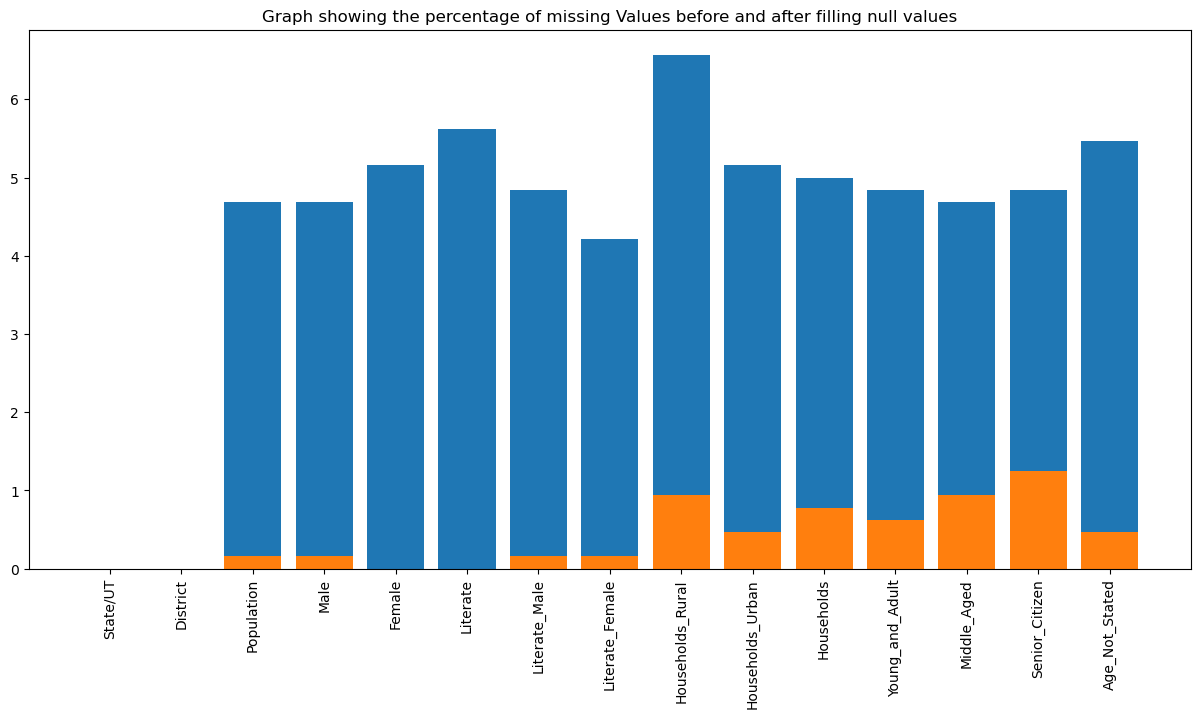

In [77]:
fig, ax = plt.subplots(figsize = (15,7))
plt.bar(x = missing_percents_before.index, height = missing_percents_before);
plt.bar(x = missing_percents_after.index, height = missing_percents_after);
plt.xticks(rotation= 90);
plt.title('Graph showing the percentage of missing Values before and after filling null values');

***The graph clearly shows that we have fixed a much percent of null data. There is very less percent of null data after fixing it

#### 6. Save Data
- Save the processed data to a CSV file named “census.csv” in the “Clean_Data” folder.

In [78]:
census.to_csv('.//Clean_Data//census.csv')

# Housing Data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
housing = pd.read_csv(r"C:\Users\Futurense\Futurense Training\Projects\Health Care\DS - Python + SQL + ETL - Healthcare Census\Data\housing.csv")

In [7]:
housing.head()

,State Code,State Name,District Code,District Name,Tehsil Code,Tehsil Name,Town Code/Village code,Ward No,Area Name,Rural/Urban,...,Contition_T_Total,Contition_T_Good,Contition_T_Livable,Contition_T_Dilapidated,Contition_R_Total,Residence_Good,Residence_Livable,Residence_Dilapidated,Residence_cum_other,Residence_cum_Good
0,1,JAMMU & KASHMIR,1,Kupwara,0,Kupwara,0,0,District - Kupwara,Rural,...,100,33.6,58.1,8.3,90.9,32.7,51.0,7.2,9.1,1.0
1,1,JAMMU & KASHMIR,1,Kupwara,0,Kupwara,0,0,District - Kupwara,Total,...,100,34.8,57.3,7.9,91.0,33.8,50.2,6.9,9.0,0.9
2,1,JAMMU & KASHMIR,1,Kupwara,0,Kupwara,0,0,District - Kupwara,Urban,...,100,45.7,49.5,4.8,91.8,45.0,42.2,4.5,8.2,0.7
3,1,JAMMU & KASHMIR,2,Badgam,0,Badgam,0,0,District - Badgam,Rural,...,100,49.7,46.3,3.9,97.2,49.0,44.5,3.7,2.8,0.7
4,1,JAMMU & KASHMIR,2,Badgam,0,Badgam,0,0,District - Badgam,Total,...,100,51.6,44.7,3.8,97.3,50.8,43.0,3.5,2.7,0.8


In [8]:
housing.shape

(1908, 156)

### 7. Process relevant data
- District Name, Rural/Urban, Total Number of households, Total Number of Livable, Total Number of Dilapidated, Latrine_premise

In [9]:
housing = housing[['District Name', 'Rural/Urban','Total Number of households','Total Number of Livable', 'Total Number of Dilapidated','Latrine_premise']]

In [10]:
housing.shape

(1908, 6)

In [11]:
housing.isnull().sum()

District Name                  0
Rural/Urban                    0
Total Number of households     0
Total Number of Livable        0
Total Number of Dilapidated    0
Latrine_premise                0
dtype: int64

In [85]:
s = housing.groupby('District Name')['Rural/Urban'].nunique() < 3
s[s]

District Name
Central            True
Chennai            True
Hyderabad          True
Kinnaur            True
Kolkata            True
Lahul & Spiti      True
Mahe               True
Mumbai             True
Mumbai Suburban    True
New Delhi          True
Nicobars           True
Yanam              True
Name: Rural/Urban, dtype: bool

In [86]:
missing_districts = housing.groupby('District Name')['Rural/Urban'].nunique() < 3
missing_districts = missing_districts[missing_districts].index.tolist()

for district in missing_districts:
    if 'Rural' not in housing.loc[housing['District Name'] == district, 'Rural/Urban'].values:
        new_row = pd.DataFrame({'District Name': [district],
                                'Rural/Urban': ['Rural']})
        district_index = housing[housing['District Name'] == district].index[0]
        housing = pd.concat([housing.iloc[:district_index], new_row, housing.iloc[district_index:]], ignore_index=True)


In [87]:
for district in missing_districts:
    if 'Urban' not in housing.loc[housing['District Name'] == district, 'Rural/Urban'].values:
        new_row = pd.DataFrame({'District Name': [district],
                                'Rural/Urban': ['Urban']})
        district_index = housing[housing['District Name'] == district].index[-1] + 1
        housing = pd.concat([housing.iloc[:district_index], new_row, housing.iloc[district_index:]], ignore_index=True)


- i am filling the null values with 0 , because the rows were not included because there is no population in the area

In [140]:
housing.fillna(0, inplace = True)

In [90]:
housing.isnull().sum()

District Name                  0
Rural/Urban                    0
Total Number of households     0
Total Number of Livable        0
Total Number of Dilapidated    0
Latrine_premise                0
dtype: int64

- Replacing total number of households in housing using the Households in census

In [91]:
census.head()

,State/UT,District,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Households_Urban,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated
0,Jammu and Kashmir,Kupwara,870354.0,474190.0,396164.0,439654.0,282823.0,156831.0,158438.0,23226.0,181664.0,600759.0,178435.0,89679.0,1481.0
1,Jammu and Kashmir,Badgam,753745.0,398041.0,355704.0,335649.0,207741.0,127908.0,160649.0,27190.0,187839.0,503223.0,160933.0,88978.0,611.0
2,Ladakh,Leh(Ladakh),133487.0,78971.0,54516.0,93770.0,62834.0,30936.0,36920.0,17474.0,54394.0,70703.0,41515.0,21019.0,250.0
3,Ladakh,Kargil,140802.0,77785.0,63017.0,140802.0,56301.0,29935.0,40370.0,7774.0,48144.0,87532.0,35561.0,17488.0,221.0
4,Jammu and Kashmir,Punch,476835.0,251899.0,224936.0,261724.0,163333.0,98391.0,132139.0,15269.0,147408.0,304979.0,109818.0,61334.0,704.0


In [92]:
housing.loc[ (housing['Rural/Urban'] == 'Total'), 'Total Number of households'] = census.loc[:,'Households'].values

In [93]:
housing.isnull().sum()

District Name                  0
Rural/Urban                    0
Total Number of households     5
Total Number of Livable        0
Total Number of Dilapidated    0
Latrine_premise                0
dtype: int64

In [94]:
census.Households.isnull().sum()

5

- Replacing total number of households in housing using the Households_Rural in census

In [95]:
housing.loc[ (housing['Rural/Urban'] == 'Rural'), 'Total Number of households'] = census.loc[:,'Households_Rural'].values

In [96]:
housing.isnull().sum()

District Name                   0
Rural/Urban                     0
Total Number of households     11
Total Number of Livable         0
Total Number of Dilapidated     0
Latrine_premise                 0
dtype: int64

In [97]:
census.Households_Rural.isnull().sum()

6

- Replacing total number of households in housing using the Households_Urban in census

In [98]:
housing.loc[ (housing['Rural/Urban'] == 'Urban'), 'Total Number of households'] = census.loc[:,'Households_Urban'].values

In [99]:
housing.isnull().sum()

District Name                   0
Rural/Urban                     0
Total Number of households     14
Total Number of Livable         0
Total Number of Dilapidated     0
Latrine_premise                 0
dtype: int64

In [100]:
census.Households_Urban.isnull().sum()

3

- Now convert the values of percents in livable, dilapidated, latrine premise into absolute numbers 

In [101]:
housing['Total Number of Livable'] = (housing['Total Number of Livable']*(housing['Total Number of households']/100))

In [102]:
housing['Total Number of Dilapidated'] = (housing['Total Number of Dilapidated']*(housing['Total Number of households']/100))

In [103]:
housing['Latrine_premise'] = (housing['Latrine_premise']*(housing['Total Number of households']/100))

- Now dropping the rows having the column Rural/Urban as Total 

In [104]:
housing2 = housing.drop(housing[housing['Rural/Urban'] == 'Total'].index)

- Creating a table having the specified columns. The columns needed to be grouped based on the rural or urban category. We need to divide the data based on rura or urban for every column

In [105]:
new_table = housing2.pivot_table(index='District Name', columns='Rural/Urban', 
                                 values=['Total Number of households', 'Total Number of Livable', 
                                              'Total Number of Dilapidated', 'Latrine_premise'])
# new_table = housing2.pivot_table(index='District Name', columns='Rural/Urban')

In [106]:
new_table.columns = ['_'.join(col) for col in new_table.columns]

In [107]:
new_table = new_table.reset_index()

In [108]:
new_table = new_table.rename(columns={'District Name': 'District',
                                      'Total Number of households_Rural': 'Households_Rural',
                                      'Total Number of households_Urban': 'Households_Urban',
                                      'Total Number of Livable_Rural': 'Households_Rural_Livable',
                                      'Total Number of Livable_Urban': 'Households_Urban_Livable',
                                      'Total Number of Dilapidated_Rural': 'Households_Rural_Dilapidated',
                                      'Total Number of Dilapidated_Urban': 'Households_Urban_Dilapidated',
                                      'Latrine_premise_Rural': 'Households_Rural_Toilet_Premise',
                                      'Latrine_premise_Urban': 'Households_Urban_Toilet_Premise'})

In [109]:
new_columns = ['District',
               'Households_Rural', 'Households_Rural_Livable', 'Households_Rural_Dilapidated', 'Households_Rural_Toilet_Premise',
               'Households_Urban', 'Households_Urban_Livable', 'Households_Urban_Dilapidated', 'Households_Urban_Toilet_Premise']

In [110]:
new_table = new_table[new_columns]

In [111]:
new_table.to_csv('.//Clean_Data//housing.csv')

In [112]:
new_table.head()

,District,Households_Rural,Households_Rural_Livable,Households_Rural_Dilapidated,Households_Rural_Toilet_Premise,Households_Urban,Households_Urban_Livable,Households_Urban_Dilapidated,Households_Urban_Toilet_Premise
0,Adilabad,597466.0,213295.362,38835.290,82450.308,220248.0,51758.280,6166.944,155715.336
1,Agra,496971.0,262897.659,21369.753,82497.186,406852.0,155417.464,7730.188,333618.640
2,Ahmadabad,353169.0,143033.445,7063.380,116192.601,1845383.0,441046.537,11072.298,1699597.743
3,Ahmadnagar,1041393.0,318666.258,77063.082,407184.663,282011.0,65144.541,7050.275,207560.096
4,Aizawl,20570.0,7117.220,349.690,20035.180,80341.0,13336.606,562.387,79778.613


In [113]:
census.head()

,State/UT,District,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Households_Urban,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated
0,Jammu and Kashmir,Kupwara,870354.0,474190.0,396164.0,439654.0,282823.0,156831.0,158438.0,23226.0,181664.0,600759.0,178435.0,89679.0,1481.0
1,Jammu and Kashmir,Badgam,753745.0,398041.0,355704.0,335649.0,207741.0,127908.0,160649.0,27190.0,187839.0,503223.0,160933.0,88978.0,611.0
2,Ladakh,Leh(Ladakh),133487.0,78971.0,54516.0,93770.0,62834.0,30936.0,36920.0,17474.0,54394.0,70703.0,41515.0,21019.0,250.0
3,Ladakh,Kargil,140802.0,77785.0,63017.0,140802.0,56301.0,29935.0,40370.0,7774.0,48144.0,87532.0,35561.0,17488.0,221.0
4,Jammu and Kashmir,Punch,476835.0,251899.0,224936.0,261724.0,163333.0,98391.0,132139.0,15269.0,147408.0,304979.0,109818.0,61334.0,704.0


In [114]:
housing.shape

(1920, 6)

In [115]:
census.shape

(640, 15)

### 8. Visualise Housing Data
- Number of households for 100 people

In [116]:
temp = census['Households'] / census['Population']

In [117]:
print( 'Maximum Households per 100 people' , census.loc[temp.nlargest(1).index][['District','State/UT']].values)
print('Minimum Households per 100 people' ,census.loc[temp.nsmallest(1).index][['District','State/UT']].values)

Maximum Households per 100 people [['Lahul AND Spiti' 'Himachal Pradesh']]
Minimum Households per 100 people [['Senapati' 'Manipur']]


In [118]:
temp = temp* 100

In [119]:
counts = pd.DataFrame({'District': census['District'], 'Households' : temp})

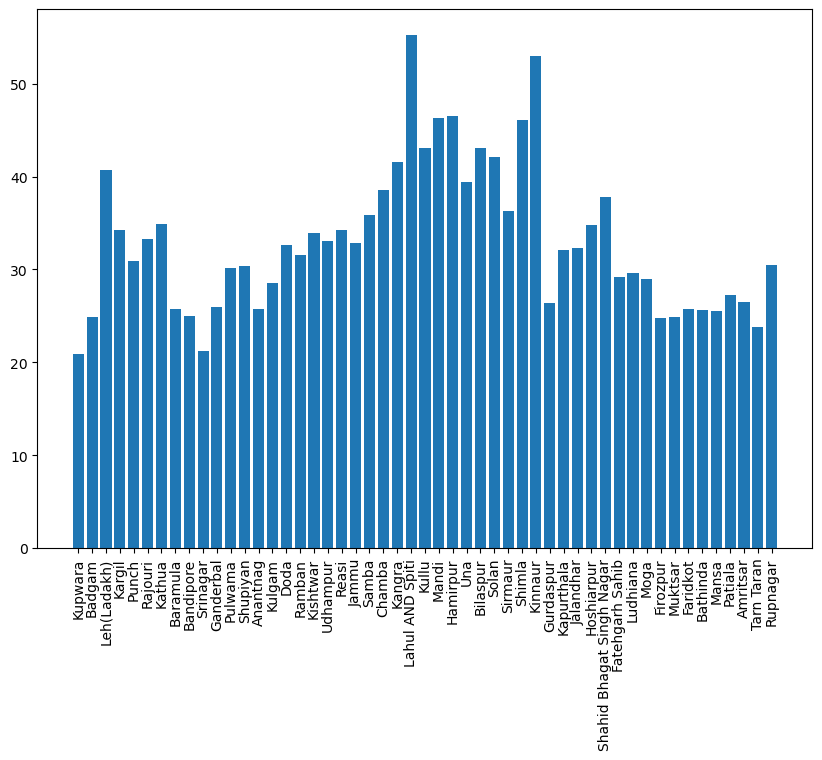

In [120]:
fig, ax = plt.subplots(figsize = (10,7))
plt.bar(x = counts.loc[0:50,'District'], height = counts.loc[0:50,'Households'], data = counts);
plt.xticks(rotation = 90);

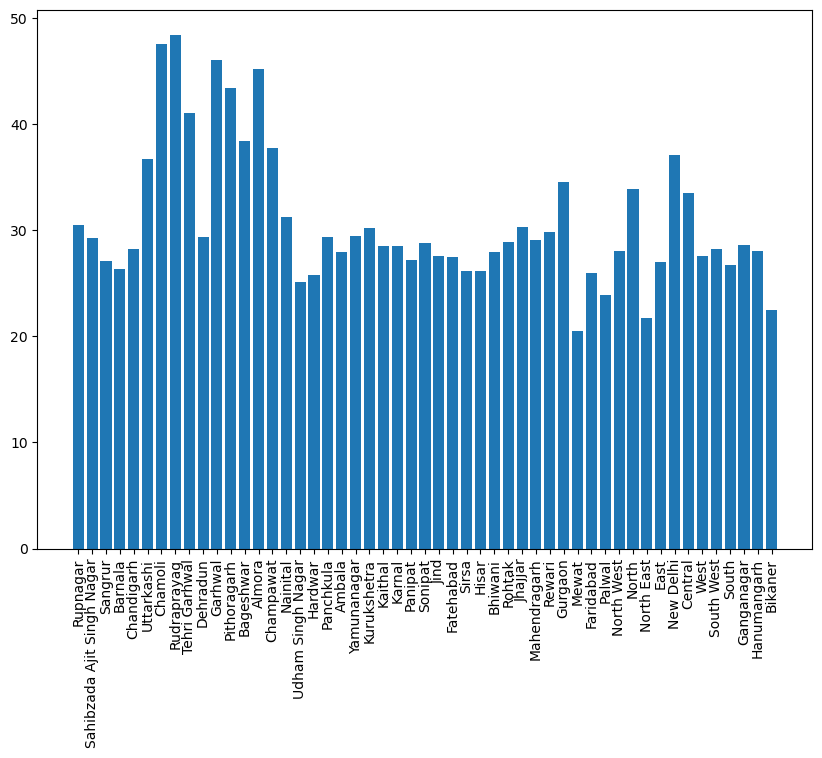

In [121]:
fig, ax = plt.subplots(figsize = (10,7))
plt.bar(x = counts.loc[50:100,'District'], height = counts.loc[50:100,'Households'], data = counts);
plt.xticks(rotation = 90);

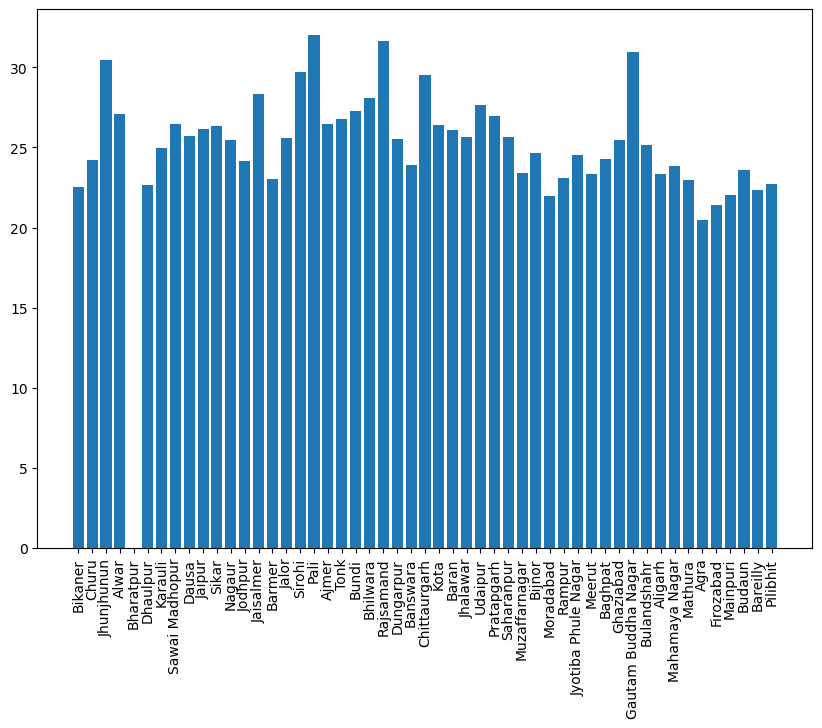

In [122]:
fig, ax = plt.subplots(figsize = (10,7))
plt.bar(x = counts.loc[100:150,'District'], height = counts.loc[100:150,'Households'], data = counts);
plt.xticks(rotation = 90);

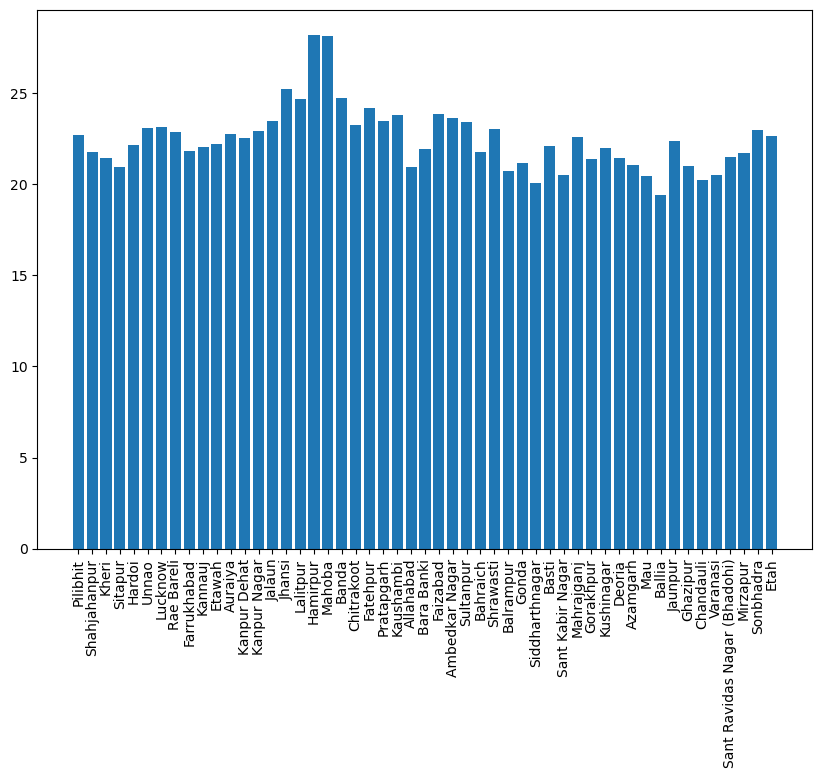

In [123]:
fig, ax = plt.subplots(figsize = (10,7))
plt.bar(x = counts.loc[150:200,'District'], height = counts.loc[150:200,'Households'], data = counts);
plt.xticks(rotation = 90);

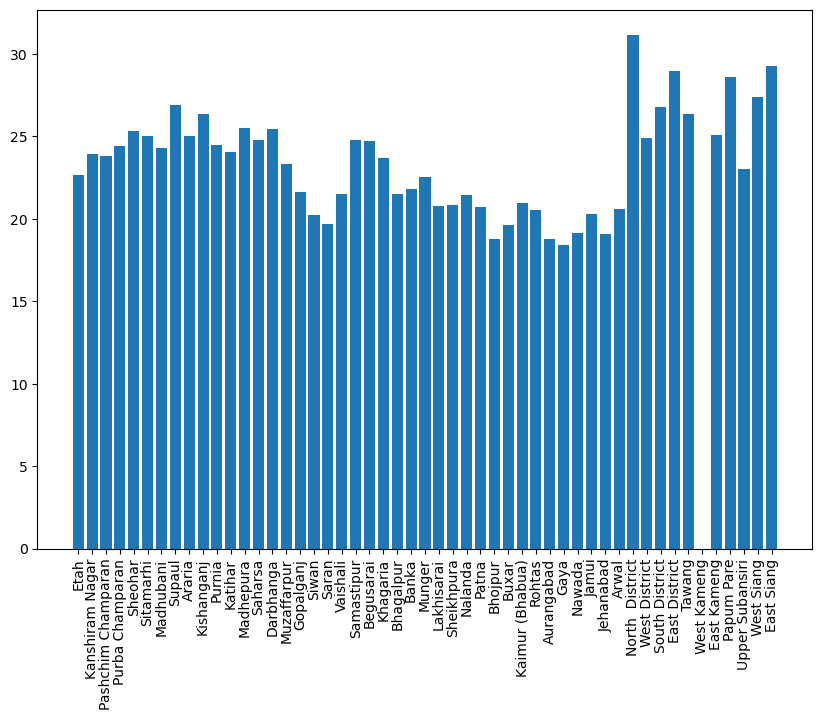

In [124]:
fig, ax = plt.subplots(figsize = (10,7))
plt.bar(x = counts.loc[200:250,'District'], height = counts.loc[200:250,'Households'], data = counts);
plt.xticks(rotation = 90);

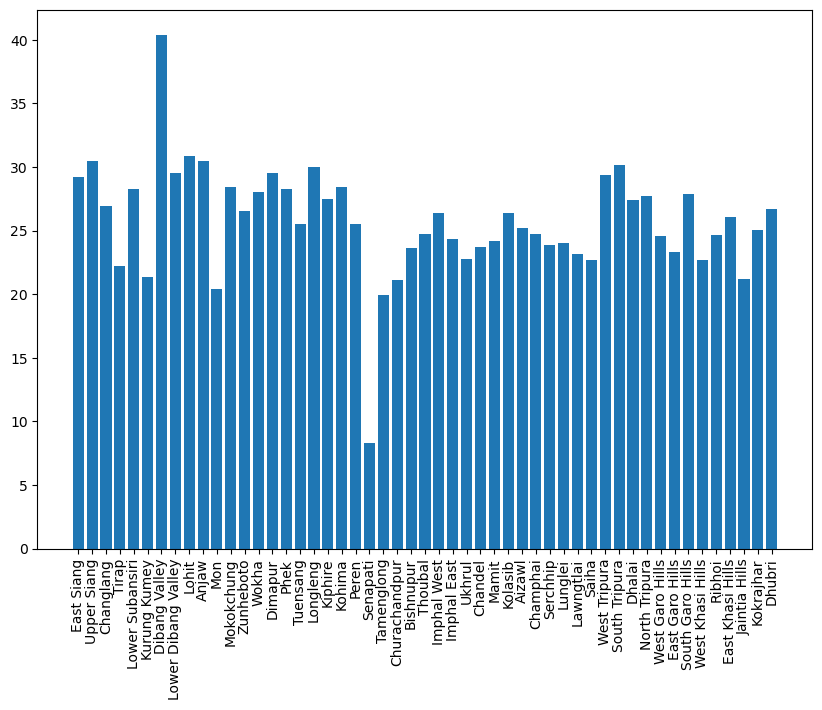

In [125]:
fig, ax = plt.subplots(figsize = (10,7))
plt.bar(x = counts.loc[250:300,'District'], height = counts.loc[250:300,'Households'], data = counts);
plt.xticks(rotation = 90);

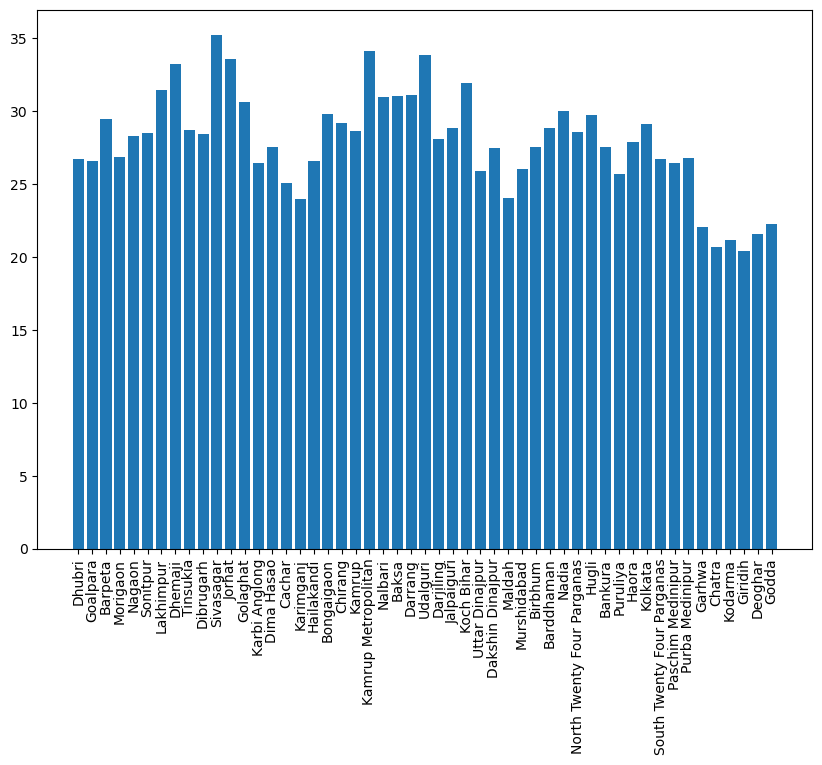

In [126]:
fig, ax = plt.subplots(figsize = (10,7))
plt.bar(x = counts.loc[300:350,'District'], height = counts.loc[300:350,'Households'], data = counts);
plt.xticks(rotation = 90);

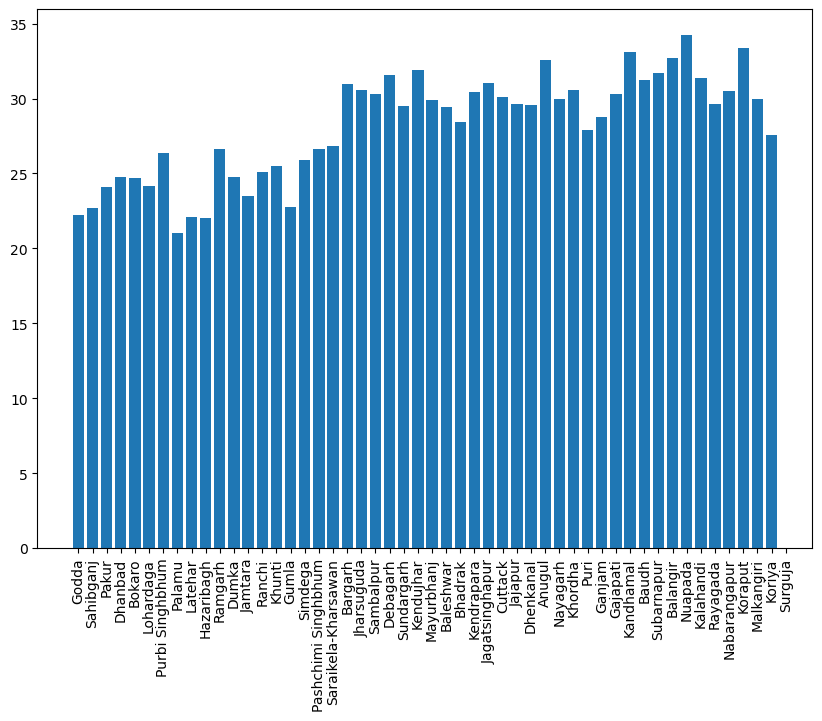

In [127]:
fig, ax = plt.subplots(figsize = (10,7))
plt.bar(x = counts.loc[350:400,'District'], height = counts.loc[350:400,'Households'], data = counts);
plt.xticks(rotation = 90);

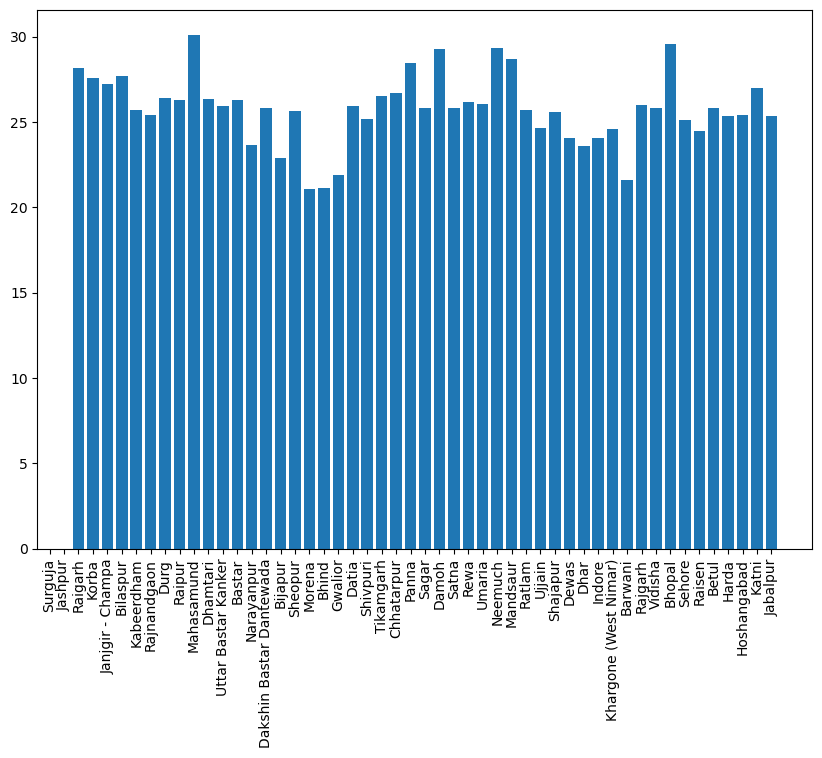

In [128]:
fig, ax = plt.subplots(figsize = (10,7))
plt.bar(x = counts.loc[400:450,'District'], height = counts.loc[400:450,'Households'], data = counts);
plt.xticks(rotation = 90);

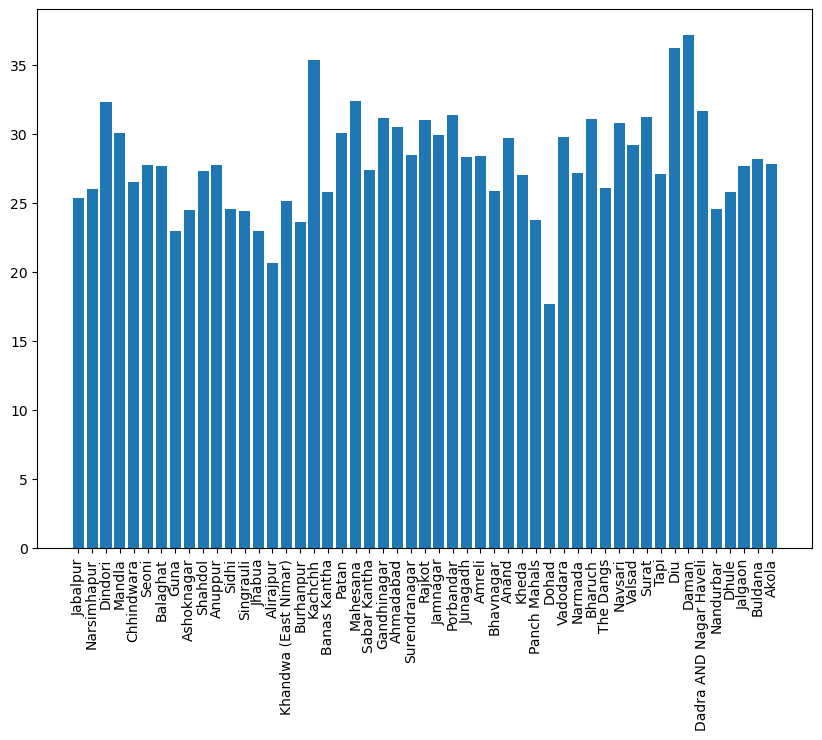

In [129]:
fig, ax = plt.subplots(figsize = (10,7))
plt.bar(x = counts.loc[450:500,'District'], height = counts.loc[450:500,'Households'], data = counts);
plt.xticks(rotation = 90);

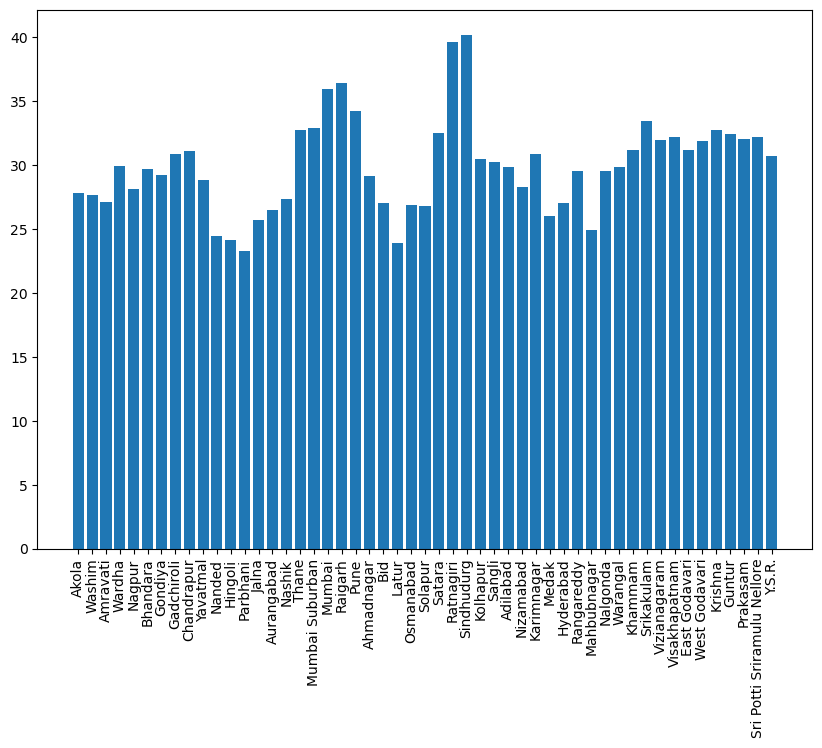

In [130]:
fig, ax = plt.subplots(figsize = (10,7))
plt.bar(x = counts.loc[500:550,'District'], height = counts.loc[500:550,'Households'], data = counts);
plt.xticks(rotation = 90);

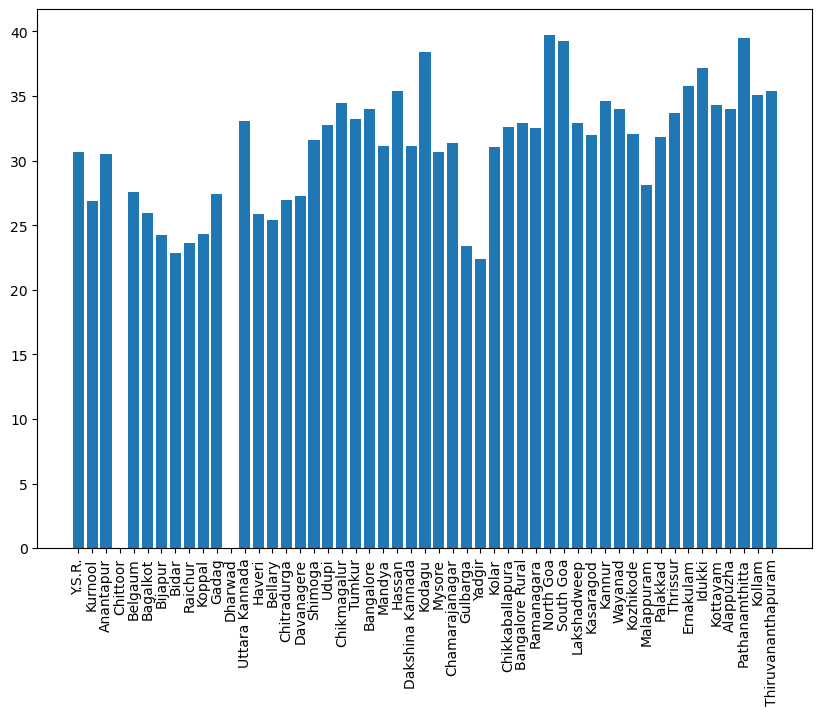

In [131]:
fig, ax = plt.subplots(figsize = (10,7))
plt.bar(x = counts.loc[550:600,'District'], height = counts.loc[550:600,'Households'], data = counts);
plt.xticks(rotation = 90);

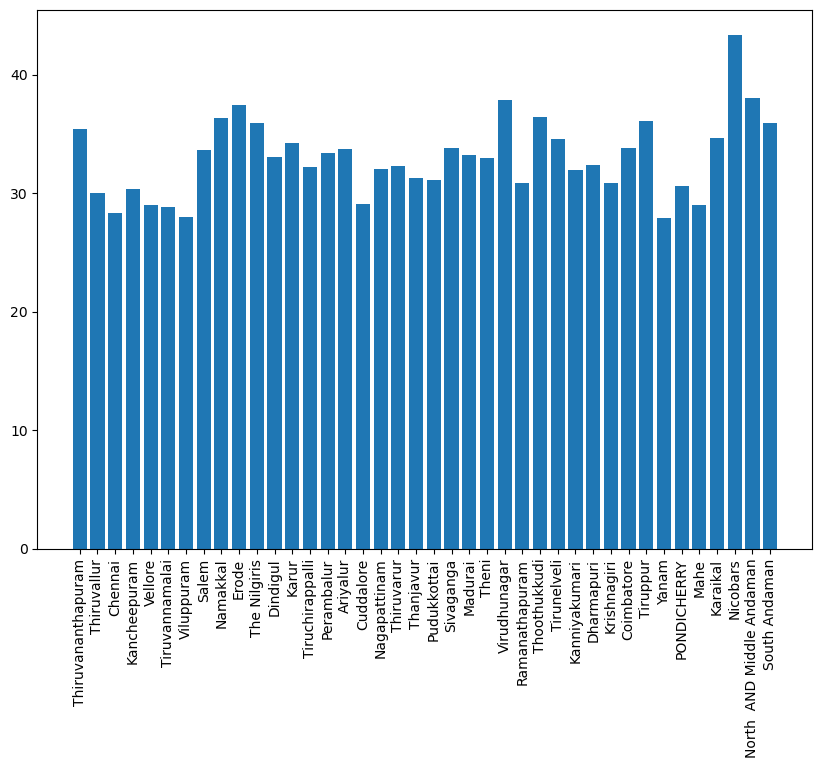

In [132]:
fig, ax = plt.subplots(figsize = (10,7))
plt.bar(x = counts.loc[600:,'District'], height = counts.loc[600:,'Households'], data = counts);
plt.xticks(rotation = 90);

In [133]:
new_table.head()

,District,Households_Rural,Households_Rural_Livable,Households_Rural_Dilapidated,Households_Rural_Toilet_Premise,Households_Urban,Households_Urban_Livable,Households_Urban_Dilapidated,Households_Urban_Toilet_Premise
0,Adilabad,597466.0,213295.362,38835.290,82450.308,220248.0,51758.280,6166.944,155715.336
1,Agra,496971.0,262897.659,21369.753,82497.186,406852.0,155417.464,7730.188,333618.640
2,Ahmadabad,353169.0,143033.445,7063.380,116192.601,1845383.0,441046.537,11072.298,1699597.743
3,Ahmadnagar,1041393.0,318666.258,77063.082,407184.663,282011.0,65144.541,7050.275,207560.096
4,Aizawl,20570.0,7117.220,349.690,20035.180,80341.0,13336.606,562.387,79778.613


- Percentage of households that have toilet(s) in premise to the total number of households.

In [134]:
temp = ((new_table['Households_Urban_Toilet_Premise'] + new_table['Households_Rural_Toilet_Premise'])/(new_table['Households_Urban'] + new_table['Households_Rural']))

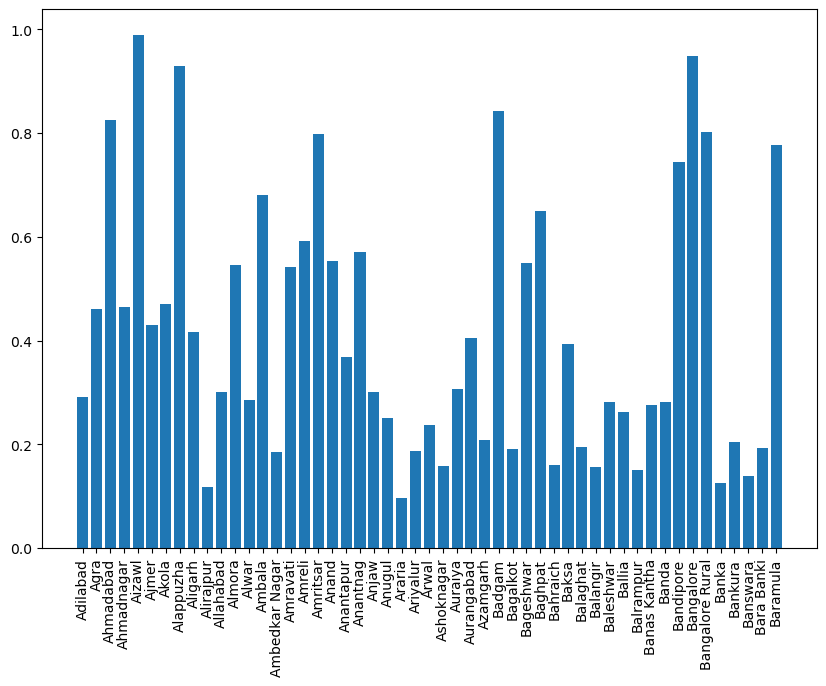

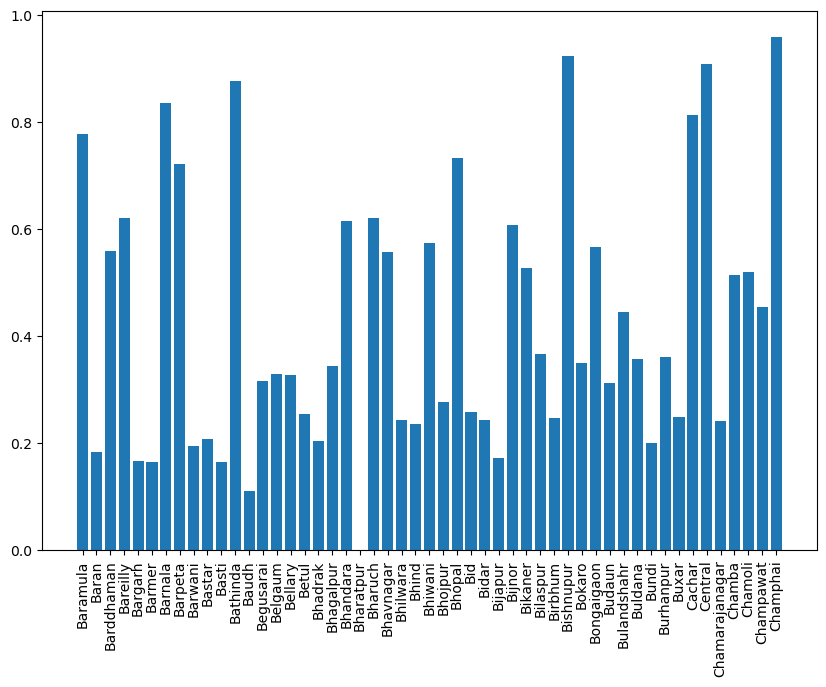

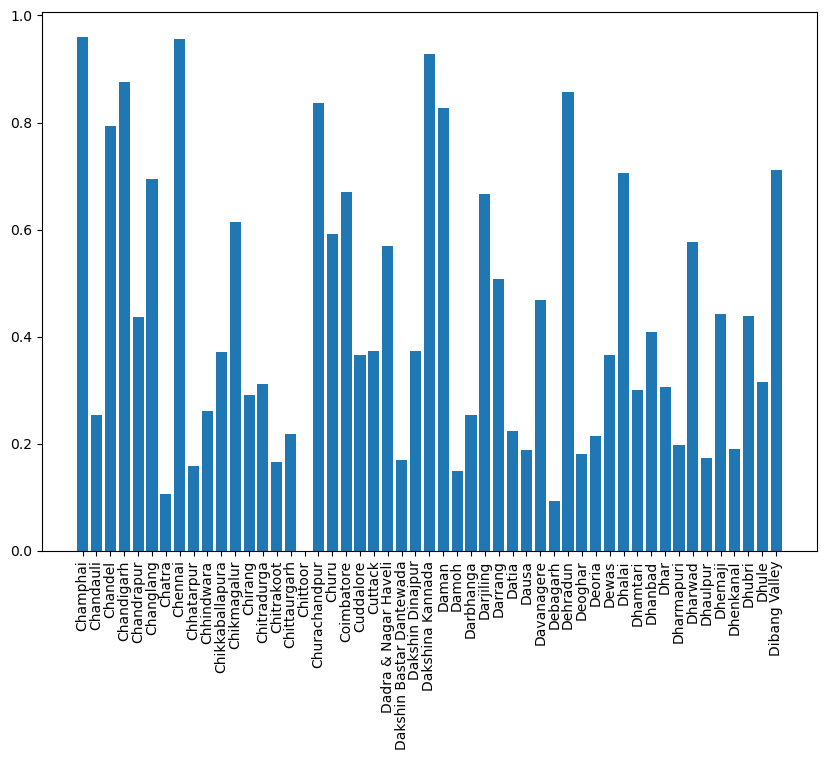

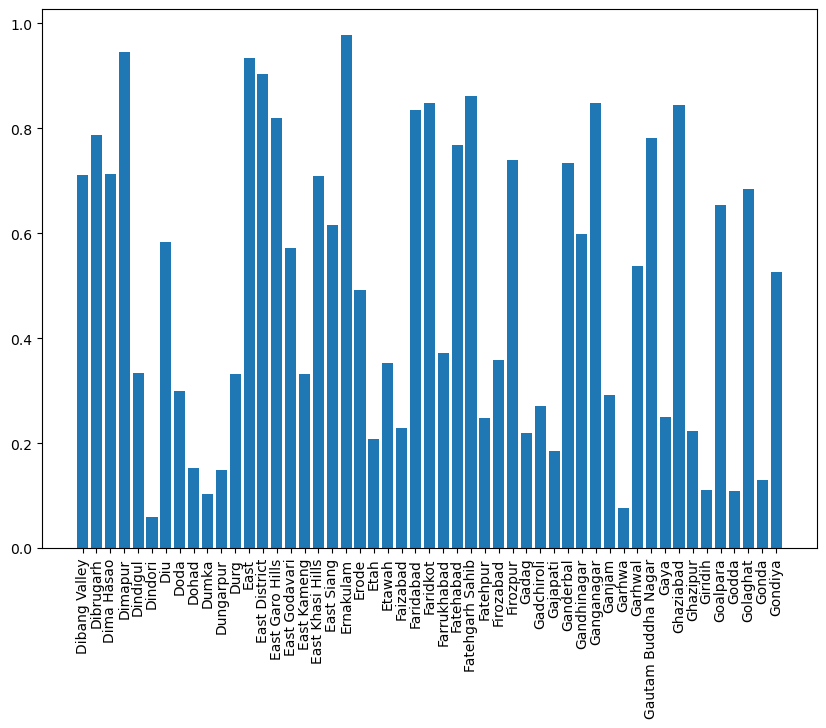

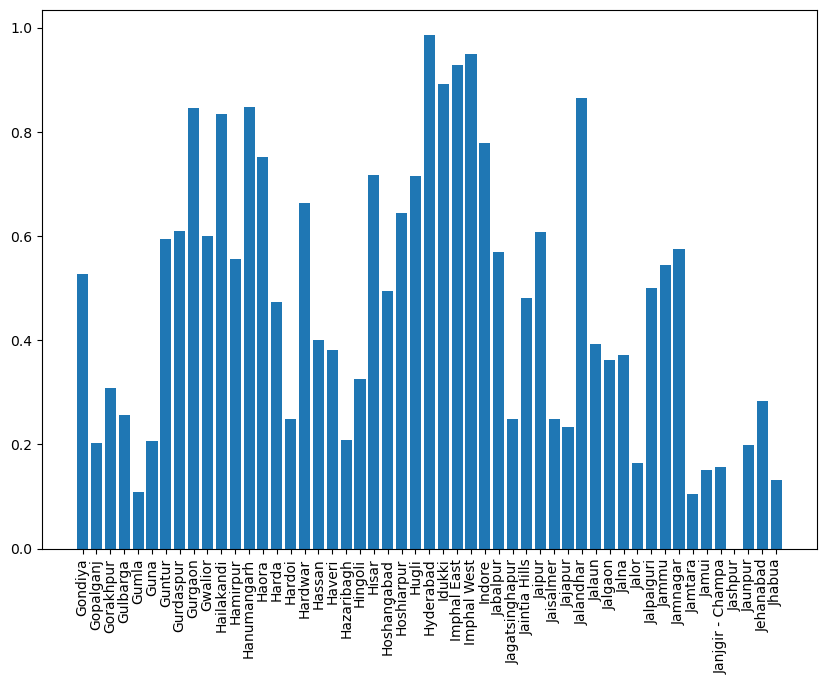

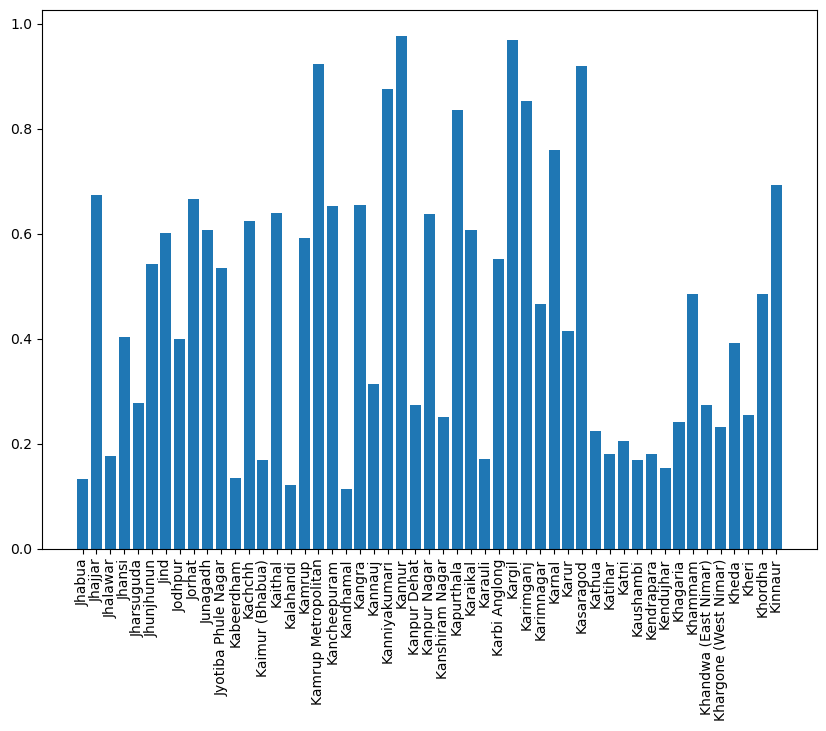

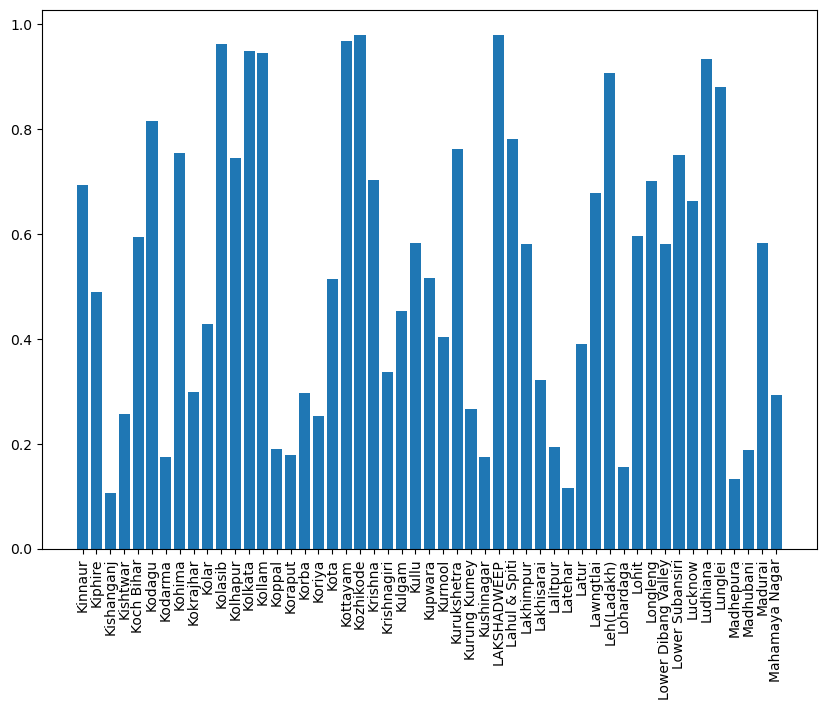

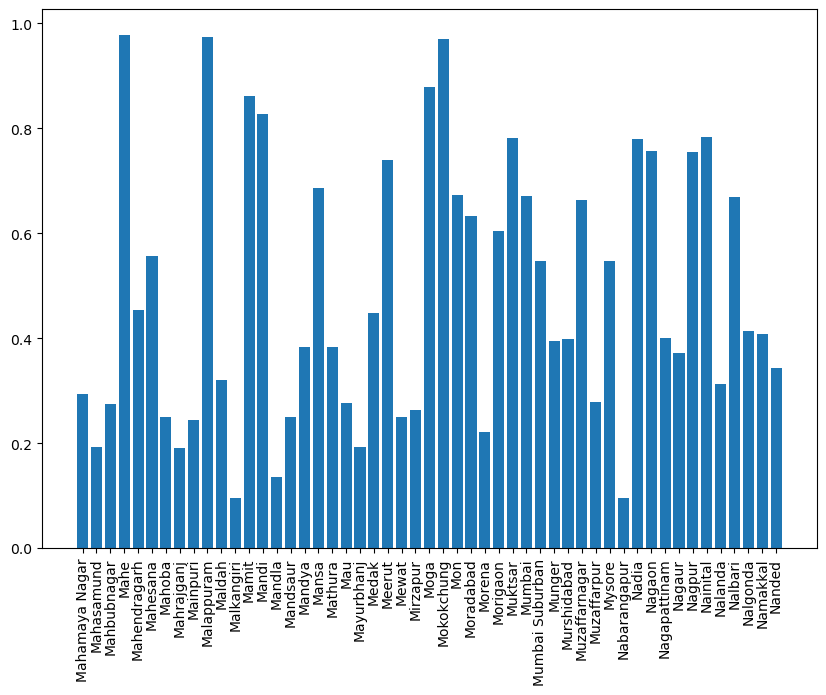

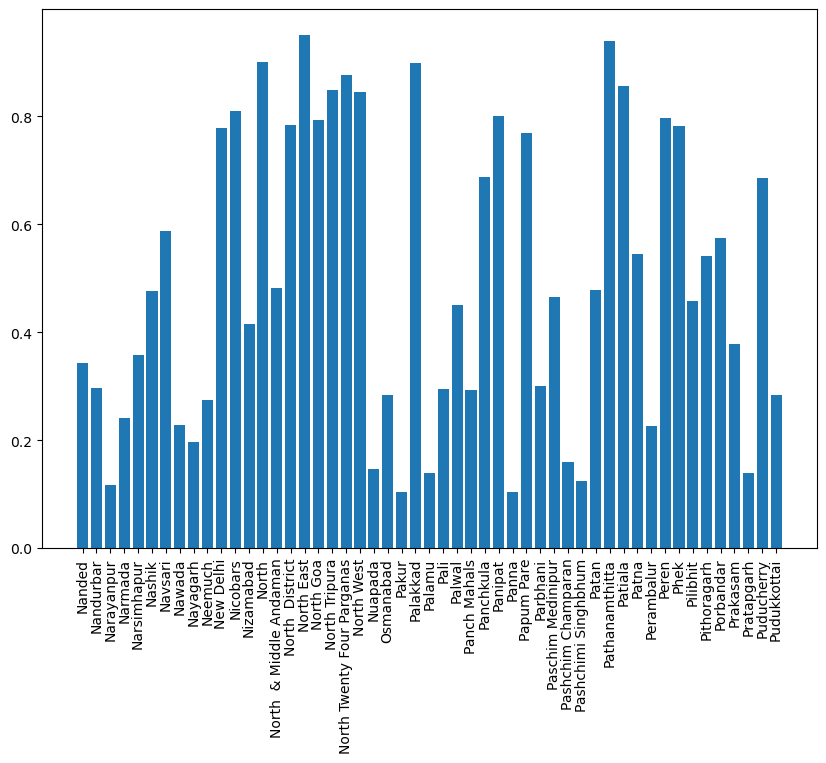

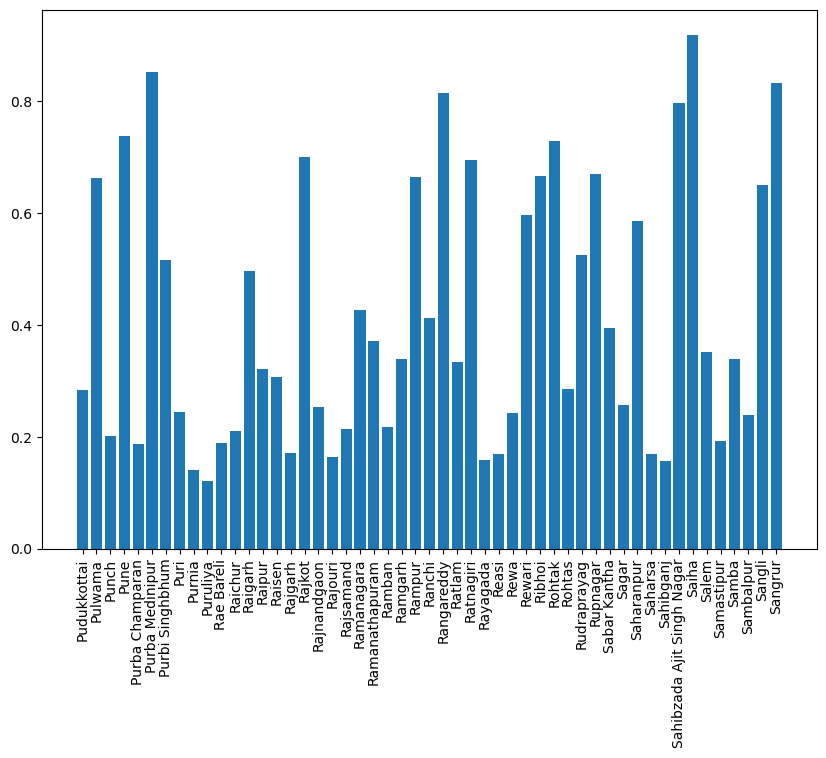

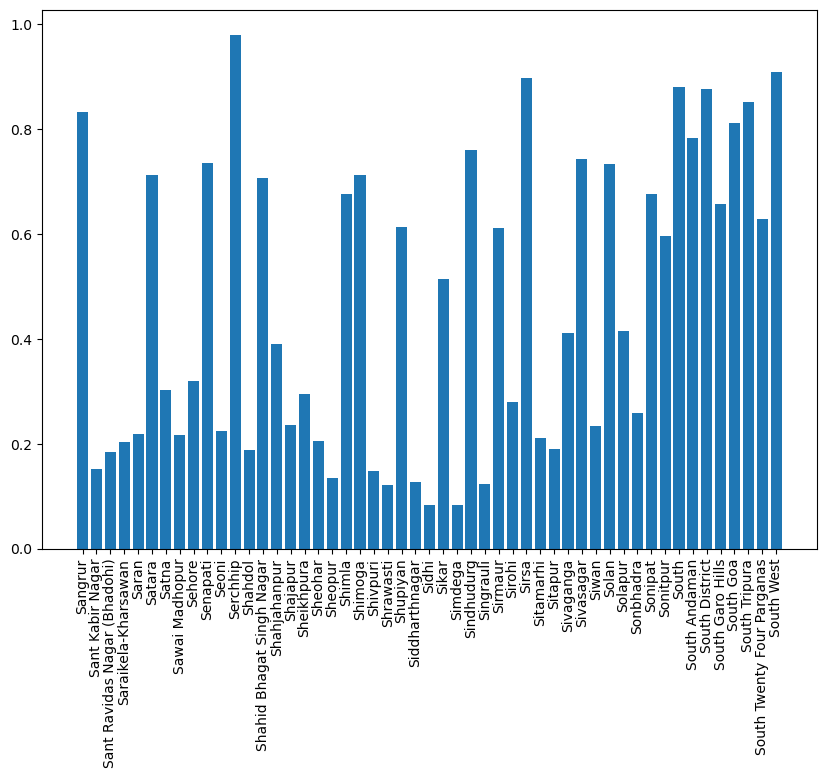

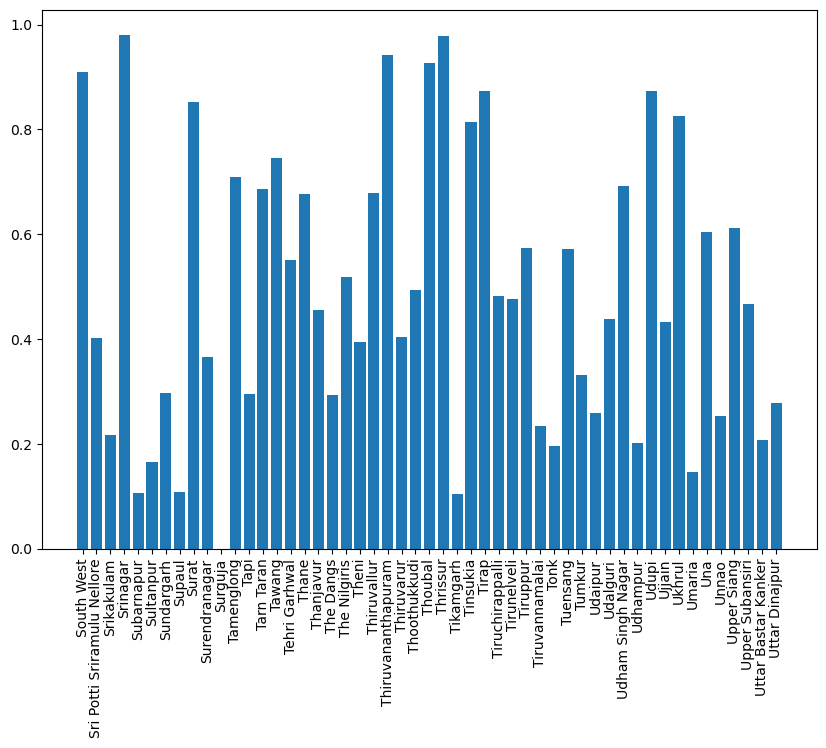

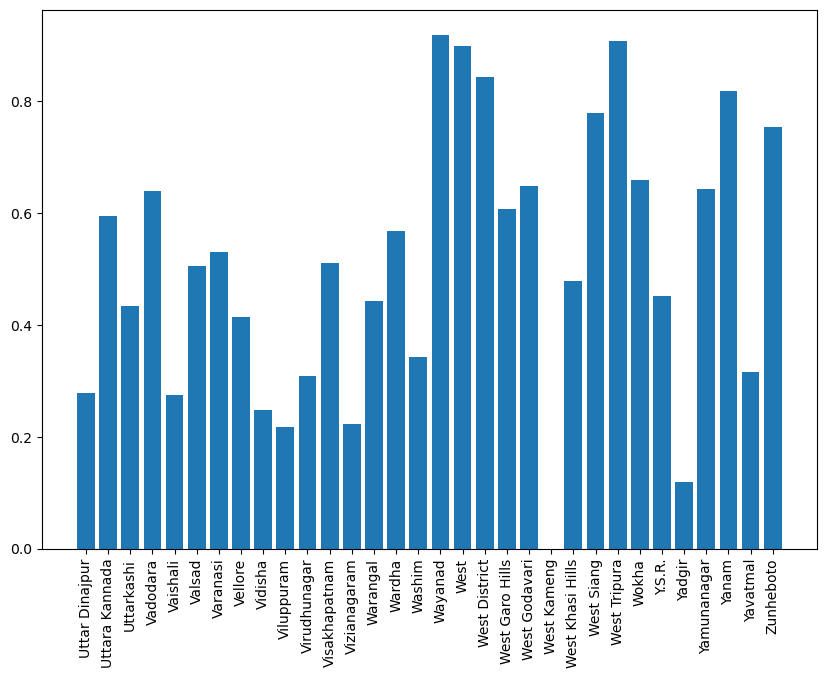

In [135]:
counts = pd.DataFrame({'District': new_table['District'] , 'Toilet_Premise%' : temp})
for i in range(13):
    fig, ax = plt.subplots(figsize = (10,7))
    plt.bar(x = counts.loc[50*i:50*(i+1),'District'], height = counts.loc[50*i:50*(i+1),'Toilet_Premise%'], data = counts);
    plt.xticks(rotation = 90);

In [136]:
temp = new_table['Households_Urban'] / new_table['Households_Rural']

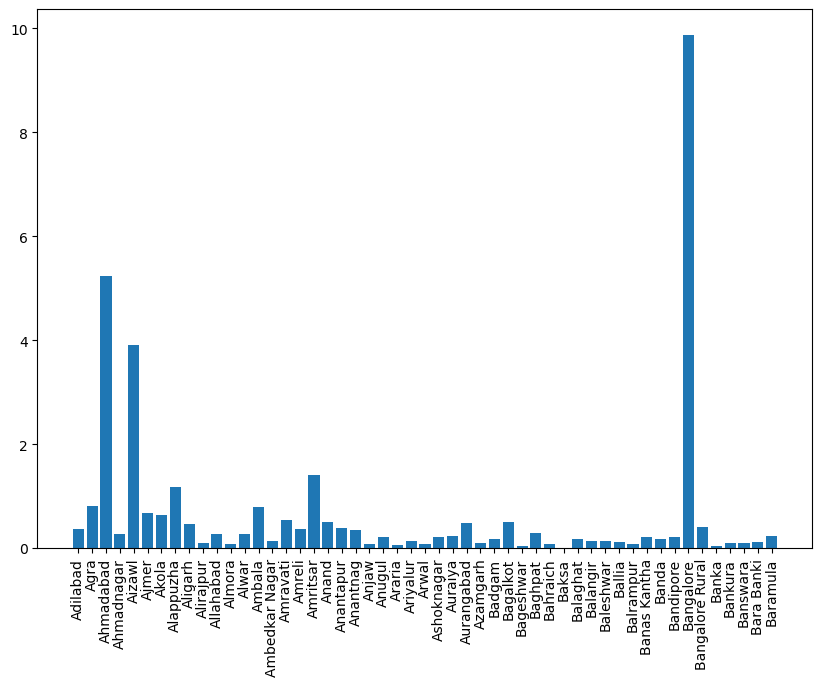

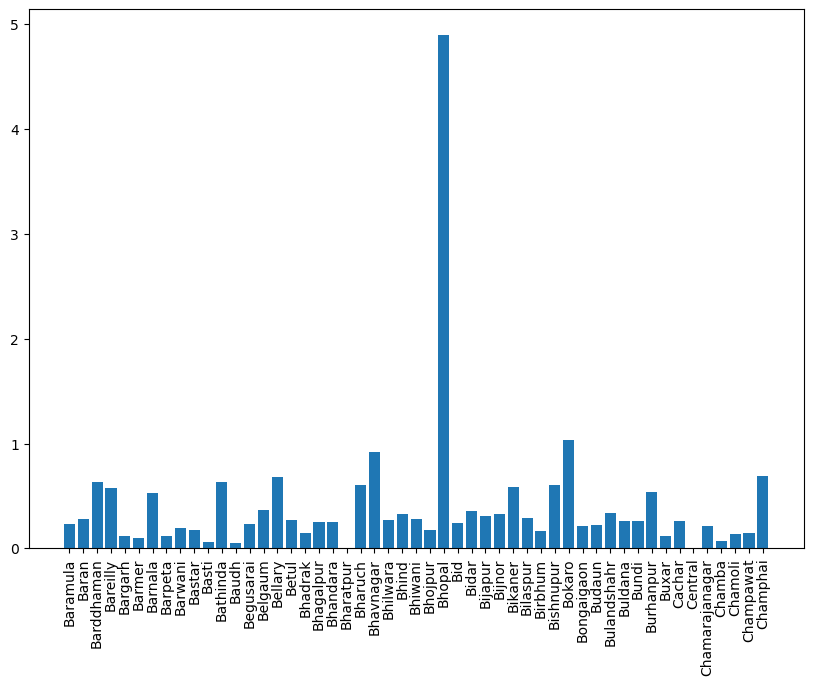

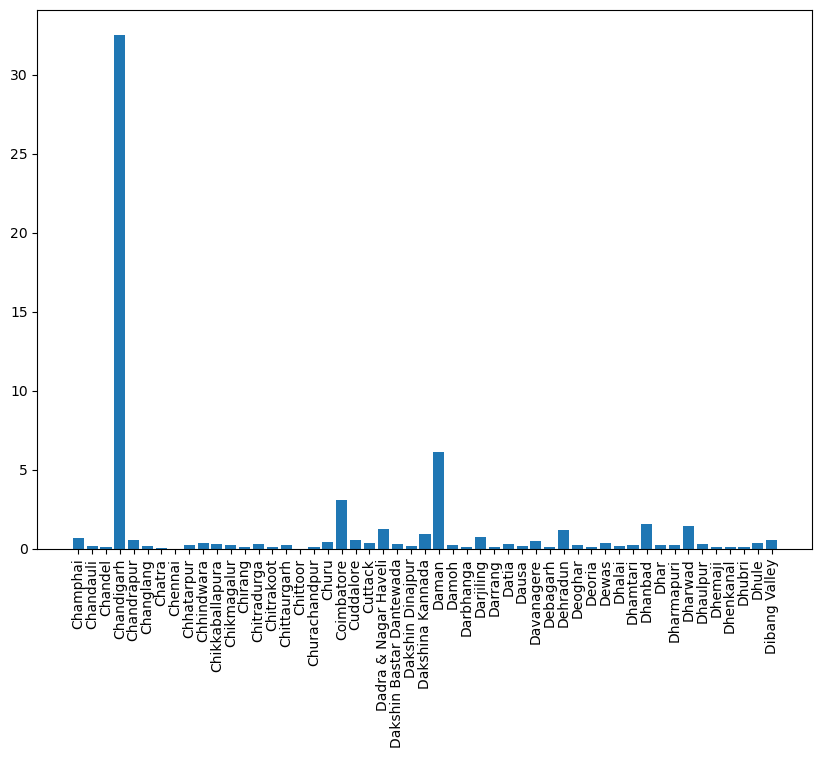

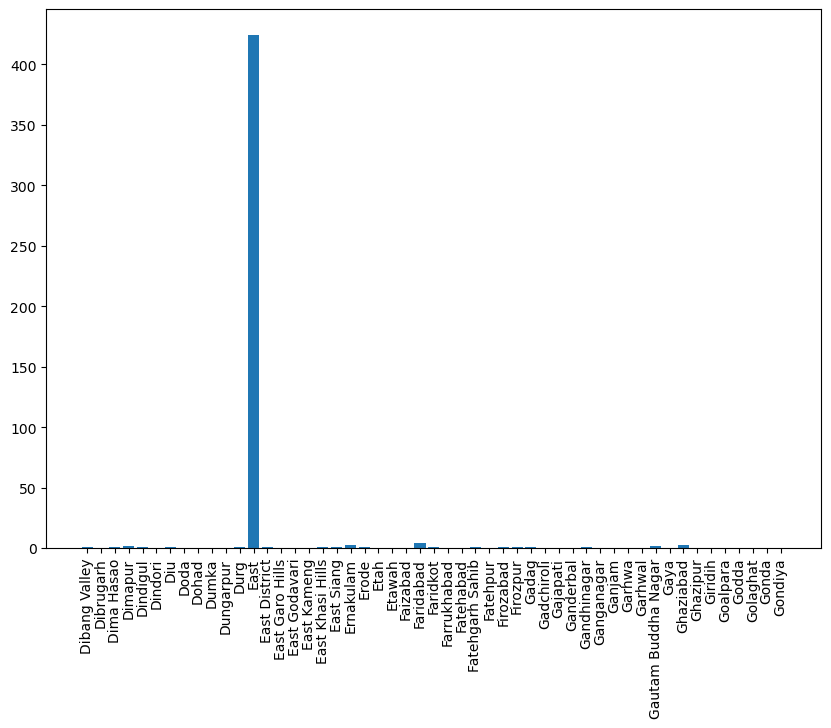

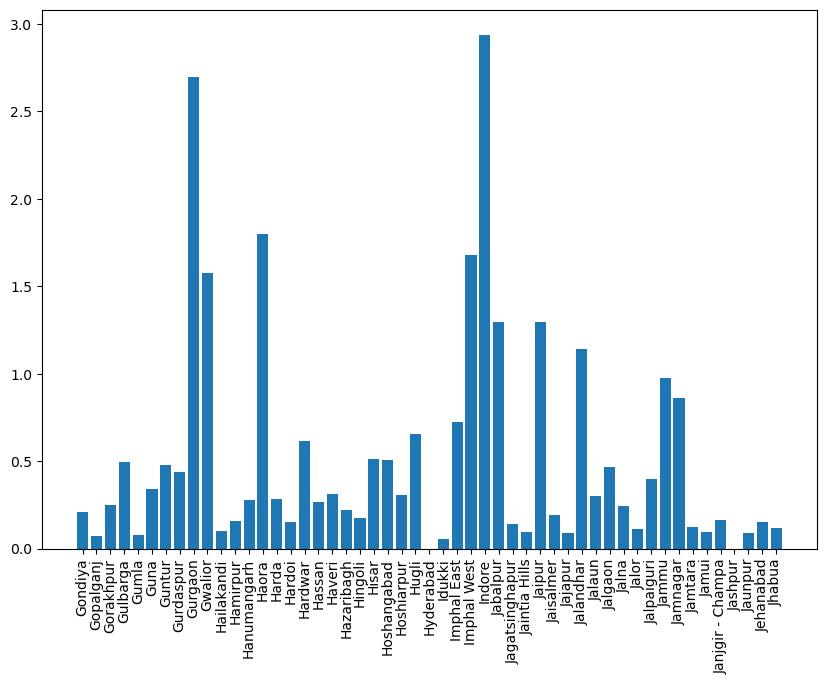

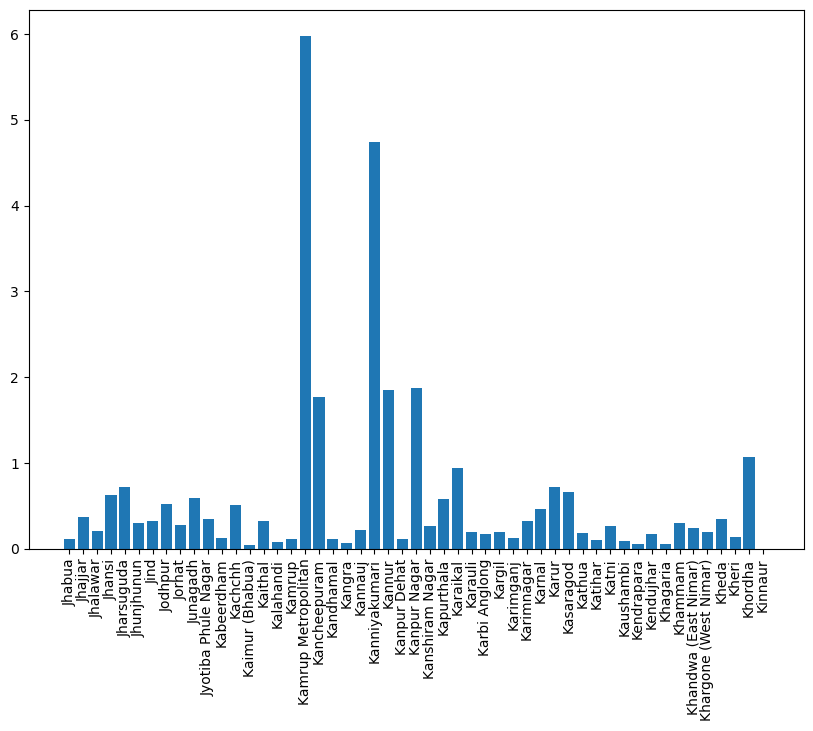

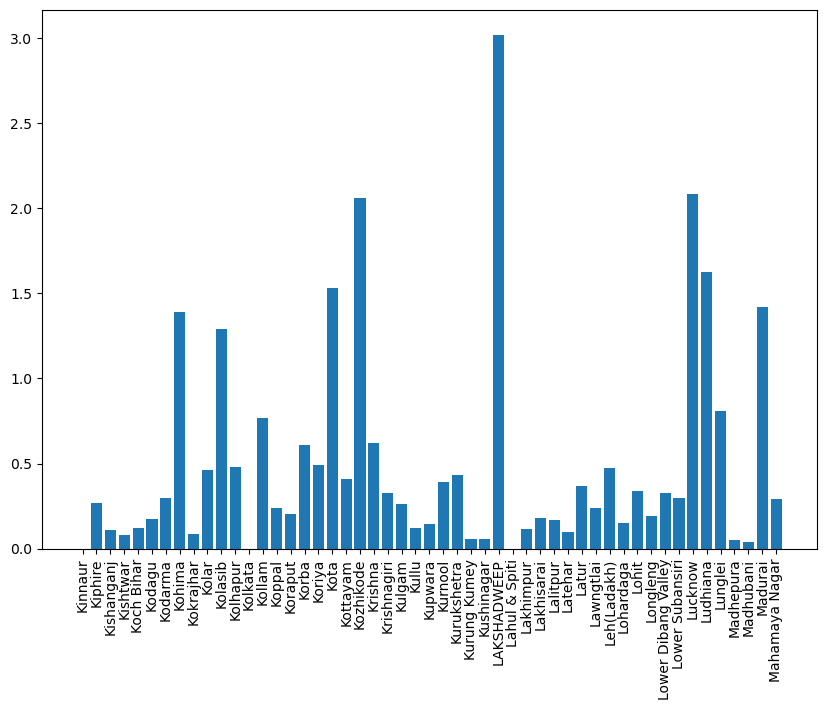

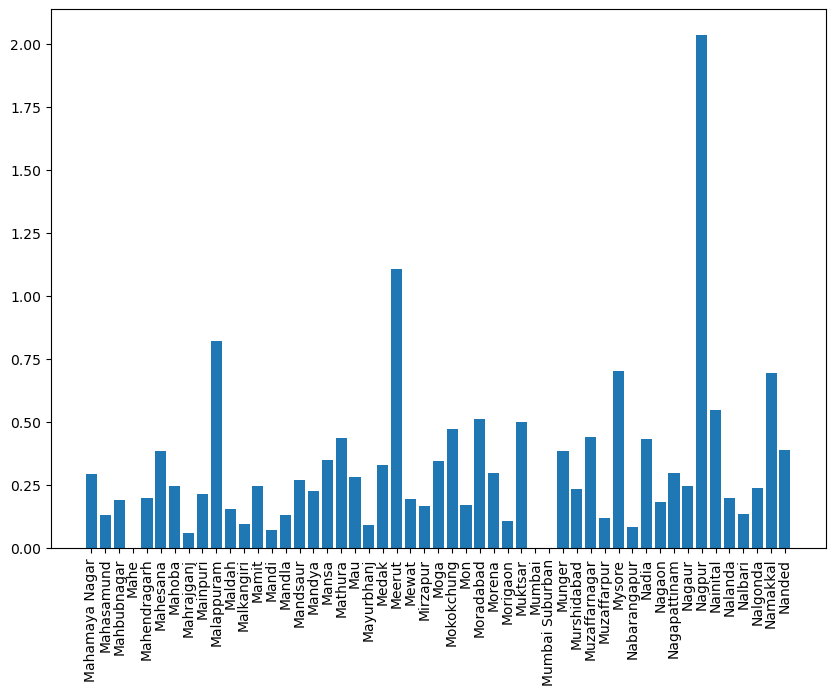

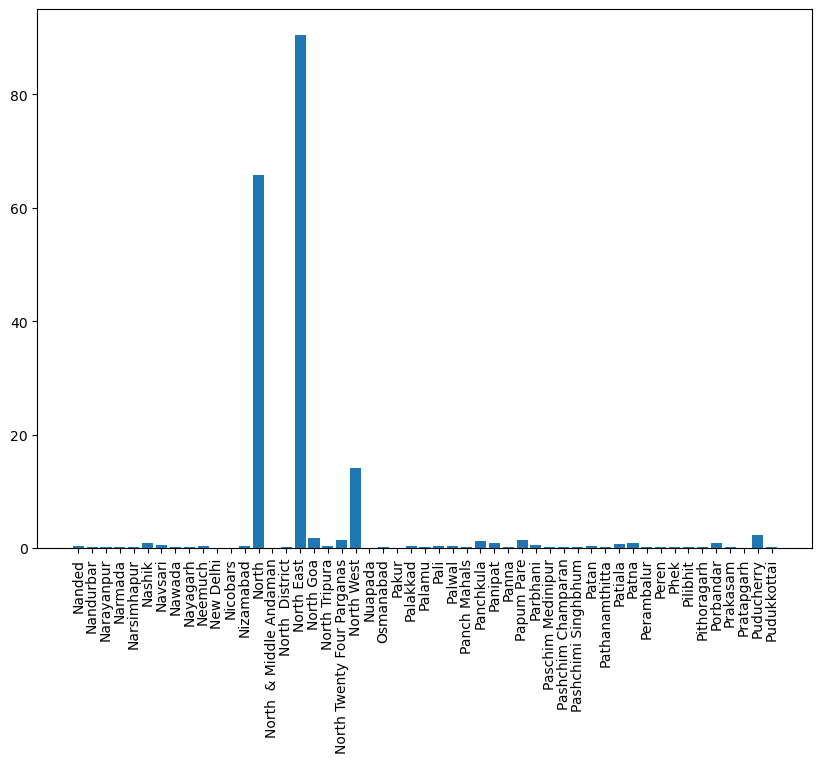

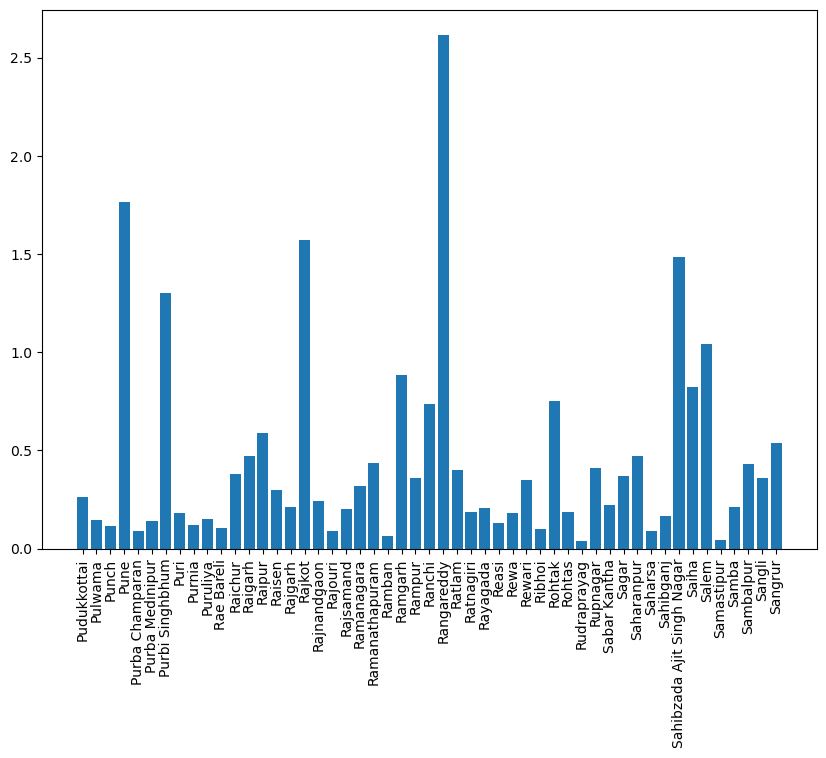

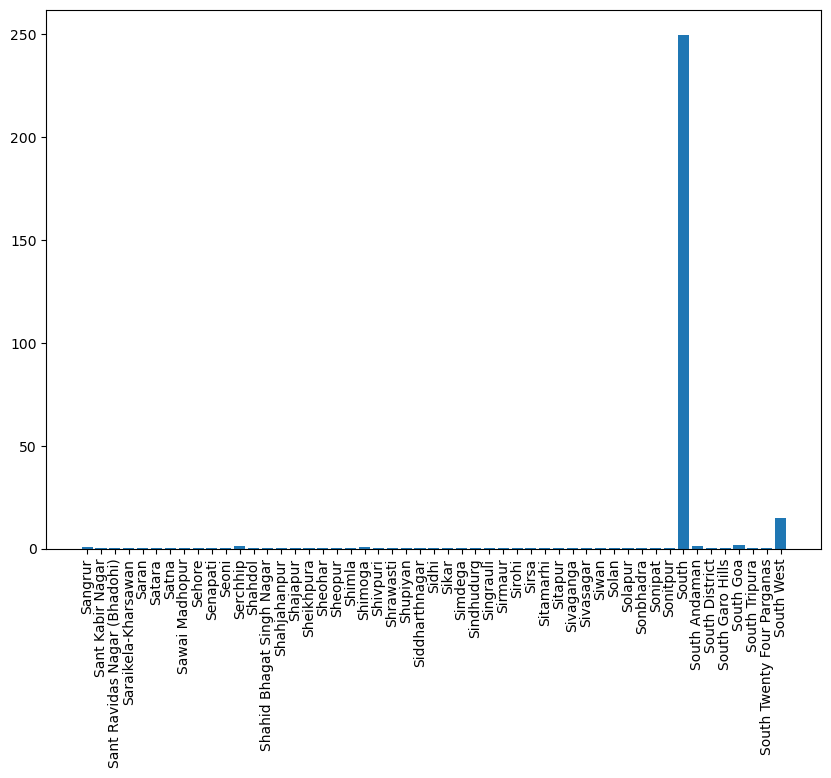

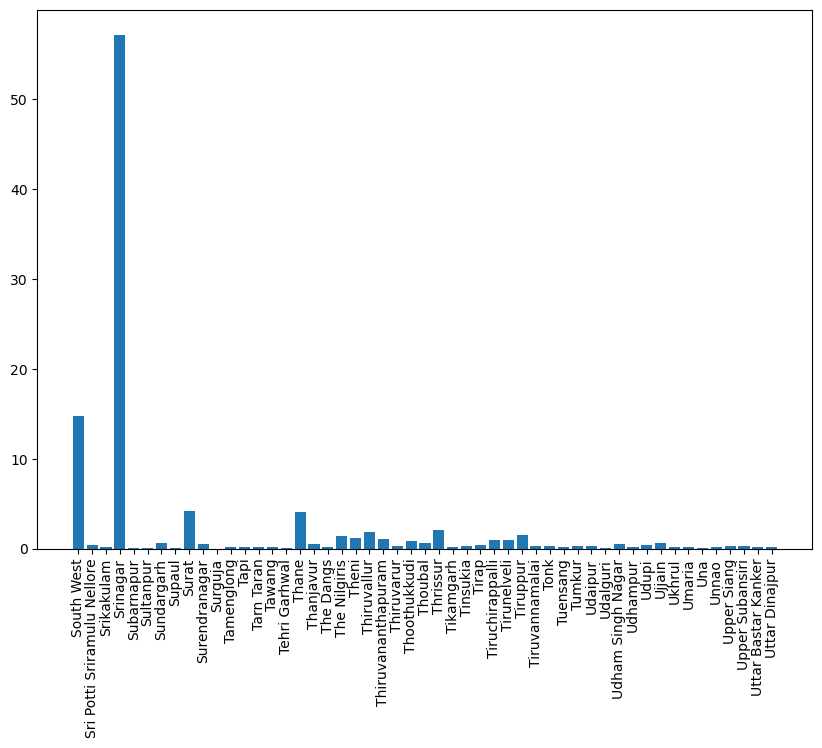

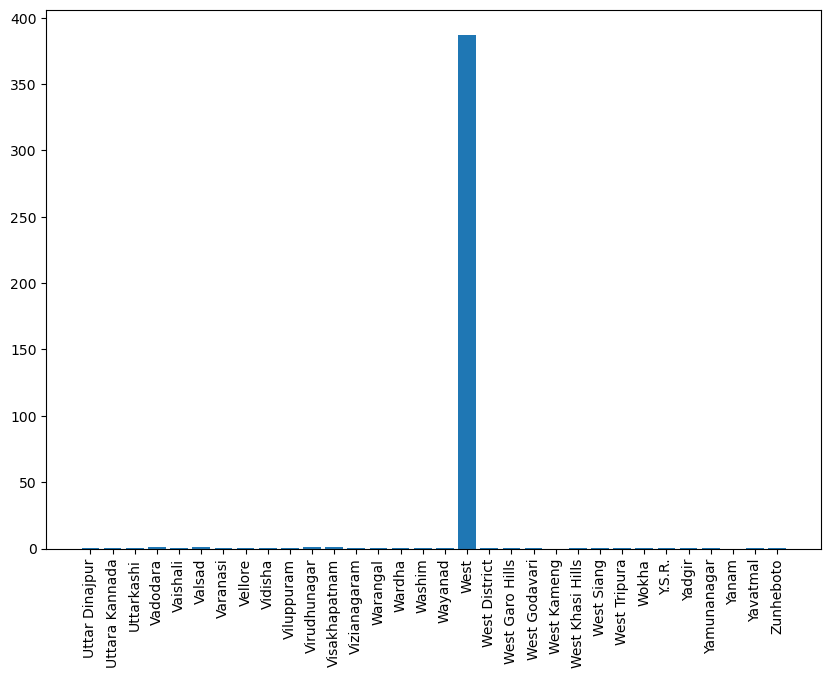

In [137]:
counts = pd.DataFrame( {'District' : new_table['District'], 'U2R%' : temp } )
for i in range(13):
    fig, ax = plt.subplots(figsize = (10,7))
    plt.bar(x = counts.loc[50*i:50*(i+1),'District'], height = counts.loc[50*i:50*(i+1),'U2R%'], data = counts);
    plt.xticks(rotation = 90);

In [138]:
housing = new_table.copy()

### 9. Incinsistency in Datasets
- In “Households_Rural” and “Households_Urban” A difference of more than 10% can be considered a major difference. Report the names of the districts where a major difference is found in the data

In [139]:
census.columns

Index(['State/UT', 'District', 'Population', 'Male', 'Female', 'Literate',
       'Literate_Male', 'Literate_Female', 'Households_Rural',
       'Households_Urban', 'Households', 'Young_and_Adult', 'Middle_Aged',
       'Senior_Citizen', 'Age_Not_Stated'],
      dtype='object')

In [140]:
housing.columns

Index(['District', 'Households_Rural', 'Households_Rural_Livable',
       'Households_Rural_Dilapidated', 'Households_Rural_Toilet_Premise',
       'Households_Urban', 'Households_Urban_Livable',
       'Households_Urban_Dilapidated', 'Households_Urban_Toilet_Premise'],
      dtype='object')

In [141]:
# diff_ds = housing[abs((census['Households_Rural'] - housing['Households_Rural'])/census['Households_Rural']) > 10]['District']
condition = abs((census['Households_Rural'] - housing['Households_Rural']) / census['Households_Rural']) > 10
diff_ds = housing.loc[condition, 'District']


In [142]:
diff_ds.values

array(['Ahmadnagar', 'Alirajpur', 'Allahabad', 'Ariyalur', 'Bargarh',
       'Belgaum', 'Buldana', 'Bundi', 'Burhanpur', 'Buxar', 'Cachar',
       'Chamba', 'Jalor', 'Jalpaiguri', 'Jamtara', 'Jamui',
       'Janjgir - Champa', 'Jaunpur', 'Jhajjar', 'Jhansi', 'Jhunjhunun',
       'Jind', 'Jodhpur', 'Junagadh', 'Kachchh', 'Kalahandi',
       'Kancheepuram', 'Kangra', 'Karbi Anglong', 'Karimganj',
       'Karimnagar', 'Karnal', 'Kasaragod', 'Kathua', 'Khammam',
       'Krishna', 'Longleng', 'Sahibzada Ajit Singh Nagar', 'Salem',
       'Sheohar', 'Sheopur', 'Sivaganga', 'Tumkur', 'Uttarkashi'],
      dtype=object)

# Hospital Data

### 10. Fixing the Header

In [143]:
hospital = pd.read_csv("C:\\Users\\ksaip\\Futurense Training\\Projects\\Health Care\\DS - Python + SQL + ETL - Healthcare Census\\Data\\hospitals.csv")

In [144]:
hospital.columns = ['State','Number of Primary Health Centers(PHCs)','Community Health Centers(CHCs)' ,'Sub-District/Divisional Hospitals(SDHs)','District Hospitals(DHs)','Hospitals','HospitalBeds']

In [145]:
hospital.isnull().sum()

State                                      0
Number of Primary Health Centers(PHCs)     0
Community Health Centers(CHCs)             0
Sub-District/Divisional Hospitals(SDHs)    7
District Hospitals(DHs)                    0
Hospitals                                  0
HospitalBeds                               0
dtype: int64

### 11. Create a function to alter the data to create uniformity

In [146]:
def renameStateNames(df, col):
    '''This function is intended to work for only the state column. The column name may be different in different datasets so
    i have created this function to ask for both dataframe and column name of the state
    It removes & and puts and
    It removes *'''
#     df.loc[df[col] == 'Andaman & Nicobar Islands', col] = 'Andaman and Nicobar Islands'
#     df.loc[df[col] == 'Dadra & Nagar Haveli',col] = 'Dadra and Nagar Haveli'
#     df.loc[df[col] == 'Daman & Diu',col] = 'Daman and Diu'
#     df.loc[df[col] == 'Jammu & Kashmir',col] = 'Jammu and Kashmir'
#     df.loc[df[col]== 'Dadra & Nagar Haveli',col] = 'Dadra and Nagar Haveli'
    df[col] = df[col].str.replace('&', 'and', regex = True)
    df[col] =  df[col].str.replace('*','', regex = True)

In [147]:
renameStateNames(hospital, 'State')

In [148]:
help(renameStateNames)

Help on function renameStateNames in module __main__:

renameStateNames(df, col)
    This function is intended to work for only the state column. The column name may be different in different datasets so
    i have created this function to ask for both dataframe and column name of the state
    It removes & and puts and
    It removes *



In [149]:
hospital.to_csv('.//Clean_Data//all_hospitals.csv')

### 12. Analyze Healthcare facility disparity

In [150]:
hospital.columns

Index(['State', 'Number of Primary Health Centers(PHCs)',
       'Community Health Centers(CHCs)',
       'Sub-District/Divisional Hospitals(SDHs)', 'District Hospitals(DHs)',
       'Hospitals', 'HospitalBeds'],
      dtype='object')

In [151]:
temp = hospital[['State', 'HospitalBeds']]

In [152]:
temp.head()

,State,HospitalBeds
0,Andaman and Nicobar Islands,1246
1,Andhra Pradesh,60799
2,Arunachal Pradesh,2320
3,Assam,19115
4,Bihar,17796


In [153]:
temp2 = census.groupby('State/UT')['Population'].sum()

In [154]:
temp2.sum()

1209007954.0

In [155]:
temp2['Telangana']

35193978.0

In [156]:
temp = temp.set_index('State')

In [157]:
temp = pd.concat([temp, temp2], axis = 1)

In [158]:
temp['State'] = temp.index

In [159]:
temp.index = range(0,len(temp))

In [160]:
temp.dropna(inplace = True)

In [161]:
temp.loc[temp['State'] == 'All India', 'Population'] = temp2.sum()

In [162]:
temp['Population'] = temp.apply(lambda x : x['Population']/10000, axis = 1)

In [163]:
temp.loc[temp.State == 'All India', 'HospitalBeds'] = 739024

In [164]:
temp = temp.astype({'HospitalBeds': int})

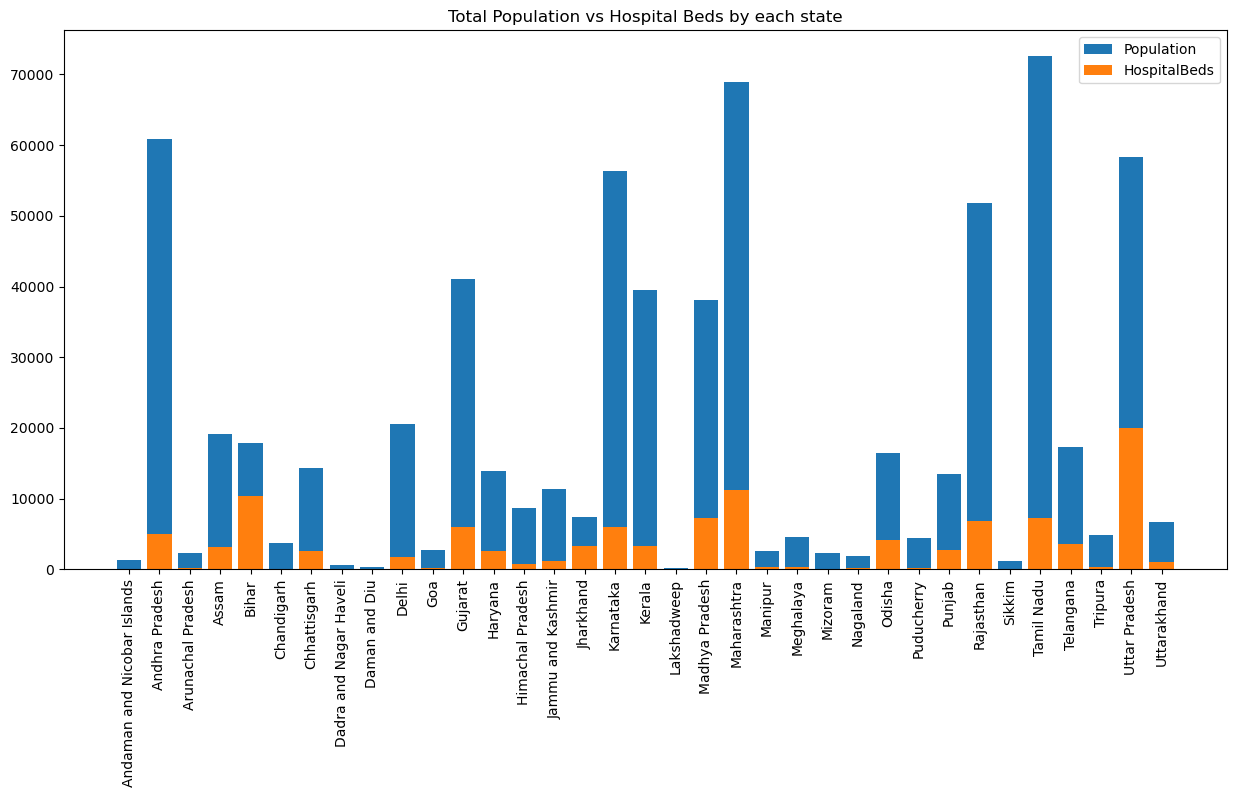

In [165]:
fig, ax = plt.subplots(figsize = (15,7))
plt.bar(x = temp['State'][:-1], height = temp['HospitalBeds'][:-1] )
plt.bar(x = temp['State'][:-1] , height = temp['Population'][:-1] )
plt.title('Total Population vs Hospital Beds by each state')
plt.legend(['Population','HospitalBeds'])
# plt.plot([temp[temp.State == 'All India']['HospitalBeds'], temp[temp.State == 'All India']['HospitalBeds']])
# Removin this plot because it acting like an outlier. State data is not understandable
plt.xticks(rotation = 90)
plt.show()

In [166]:
# temp['beds_per_population'] = temp['HospitalBeds'] / temp['Population']
temp['beds_per_population'] = temp.apply(lambda x : x['HospitalBeds'] / x['Population'], axis = 1)

In [167]:
temp.loc[temp['beds_per_population'].nsmallest(3).index]

,HospitalBeds,Population,State,beds_per_population
4,17796,10409.9452,Bihar,1.709519
15,7404,3298.8134,Jharkhand,2.244443
33,58310,19981.2341,Uttar Pradesh,2.918238


- The states with lowest hospital beds per population are listed below
- Bihar, Jharkhand and Uttar Pradesh

# Government Hospitals 

### 13. Multiline Header
- The header in (Data/government_hospitals.csv) is in 2 rows 
- The headers are required to be edited for ease of future use as well as for the sake of uniformity. 

In [168]:
govt = pd.read_csv("C:\\Users\\ksaip\\Futurense Training\\Projects\Health Care\\DS - Python + SQL + ETL - Healthcare Census\\Data\\government_hospitals.csv")

In [169]:
govt.columns

Index(['States/UTs', 'Rural hospitals', 'Unnamed: 2', 'Urban hospitals',
       'Unnamed: 4', 'As on'],
      dtype='object')

In [170]:
govt.loc[0]

States/UTs          NaN
Rural hospitals     No.
Unnamed: 2         Beds
Urban hospitals     No.
Unnamed: 4         Beds
As on               NaN
Name: 0, dtype: object

In [171]:
govt.columns = ['State/UT', 'Rural_Government_Hospitals', 'Rural_Government_Beds', 'Urban_Government_Hospitals', 'Urban_Government_Beds', 'Last_Updated']

In [172]:
govt.drop(0, inplace = True)

In [173]:
govt.columns

Index(['State/UT', 'Rural_Government_Hospitals', 'Rural_Government_Beds',
       'Urban_Government_Hospitals', 'Urban_Government_Beds', 'Last_Updated'],
      dtype='object')

### 14. Data update and code reuse
- change the Last_Updated column format to yyyy-mm-dd
- change state/ut names using previously created function

In [174]:
help(renameStateNames)

Help on function renameStateNames in module __main__:

renameStateNames(df, col)
    This function is intended to work for only the state column. The column name may be different in different datasets so
    i have created this function to ask for both dataframe and column name of the state
    It removes & and puts and
    It removes *



In [175]:
renameStateNames(govt, 'State/UT')

In [176]:
for i in range(1, len(govt)):
    govt.loc[i, 'Last_Updated'] =  '-'.join( reversed(govt.loc[i,'Last_Updated'].split('.')))

In [177]:
govt.index = range(0,37)

### 15. Government healthcare facility disparity
- the state which has the least number of government hospitals 

In [178]:
hospital.fillna(0, inplace = True)

In [179]:
hospital = hospital.loc[:35,:]

In [180]:
hospital = hospital.astype({'Number of Primary Health Centers(PHCs)' : int , 'Community Health Centers(CHCs)' : int, 'Sub-District/Divisional Hospitals(SDHs)' : int, 'District Hospitals(DHs)':int,'Hospitals':int, 'HospitalBeds': int })
# hospital.convert_dtypes().dtypes

In [181]:
lowest_3_states = hospital.loc[hospital['HospitalBeds'].nsmallest(3).index]['State']

In [182]:
lowest_3_states = lowest_3_states.values

In [183]:
govt.loc[govt['State/UT'].isin(lowest_3_states), :]

,State/UT,Rural_Government_Hospitals,Rural_Government_Beds,Urban_Government_Hospitals,Urban_Government_Beds,Last_Updated
31,Dadra and Nagar Haveli,10,273,1,316,2017-12-31
32,Daman and Diu,5,240,0,0,2015-12-31
34,Lakshadweep,9,300,0,0,2016-01-01


- Daman and Diu has lowest number of government hospitals and lowest number of beds in total private & govt hospitals

# World Health Organization Standards

### 16. Gap in number of beds


In [184]:
state_population =  census.groupby('State/UT')['Population'].sum()

In [185]:
state_hbeds = hospital[['State','HospitalBeds']]

In [186]:
state_hbeds = state_hbeds.set_index('State')

In [187]:
state_hbeds_population = pd.concat([state_hbeds, state_population.to_frame()], axis = 1)

In [188]:
state_hbeds_population.drop(state_hbeds_population.tail(1).index, inplace = True)

In [189]:
state_hbeds_population.loc[:,'Population'] =  state_hbeds_population['Population'].apply(lambda x : x/1000)

In [190]:
state_hbeds_population.loc[:,'Target'] = state_hbeds_population['Population'].apply(lambda x : x*3)

In [191]:
state_hbeds_population['Gap'] = state_hbeds_population['Target'] - state_hbeds_population['HospitalBeds']

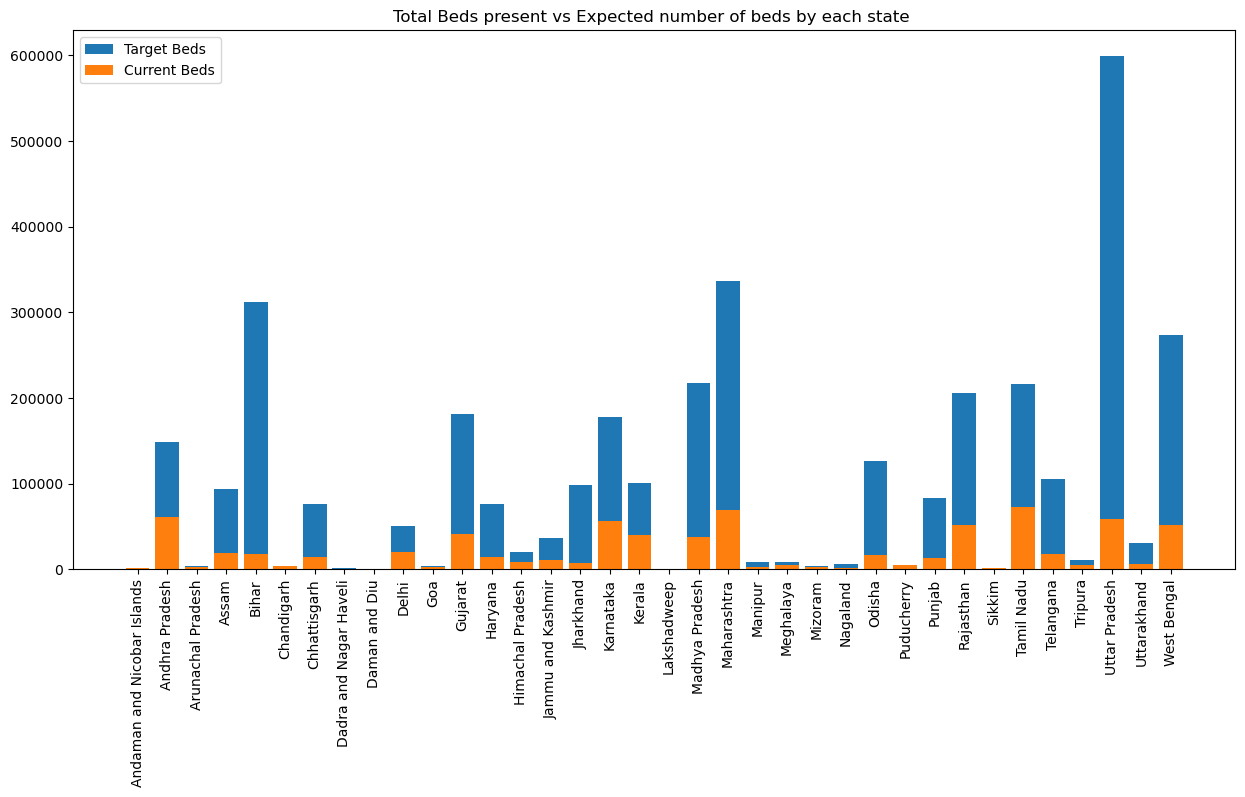

In [192]:
fig, ax = plt.subplots(figsize = (15,7))
plt.bar(x = state_hbeds_population.index, height = state_hbeds_population['Target'], label = 'Target Beds')
plt.bar(x = state_hbeds_population.index, height = state_hbeds_population['HospitalBeds'], label = 'Current Beds')
plt.xticks(rotation = 90);
plt.title('Total Beds present vs Expected number of beds by each state ')
plt.legend();

In [193]:
state_hbeds_population.loc['All India'] = state_hbeds_population.apply(lambda x : x.sum())

In [194]:
state_hbeds_population.loc['All India']

HospitalBeds     739024.000
Population      1208733.665
Target          3626200.995
Gap             2887176.995
Name: All India, dtype: float64

In [195]:
temp.loc[36] = [temp['HospitalBeds'].sum(), temp['Population'].sum(),'All India' ,0]

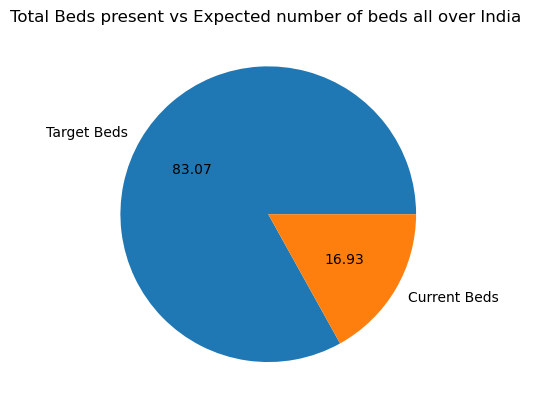

In [196]:

# plt.bar(x = 'All India', height = state_hbeds_population.loc['All India', 'Target'] , label = 'Target Beds')
# plt.bar(x = 'All India', height = state_hbeds_population.loc['All India', 'HospitalBeds'], label = 'Current Beds')
# plt.xticks(rotation = 90);
# plt.legend();

plt.pie([state_hbeds_population.loc['All India', 'Target'], state_hbeds_population.loc['All India', 'HospitalBeds']], labels = ['Target Beds', 'Current Beds'], autopct = '%0.2f');
plt.title('Total Beds present vs Expected number of beds all over India ');


### 17. Hospitals required to meet the standards

In [197]:
govt = govt.astype({'Rural_Government_Hospitals' : int, 'Rural_Government_Beds' : int})

In [198]:
avg_beds = govt['Rural_Government_Beds'].sum() / govt['Rural_Government_Hospitals'].sum()

In [199]:
state_hbeds_population['div'] = state_hbeds_population['Gap'].apply(lambda x : round(x/avg_beds))

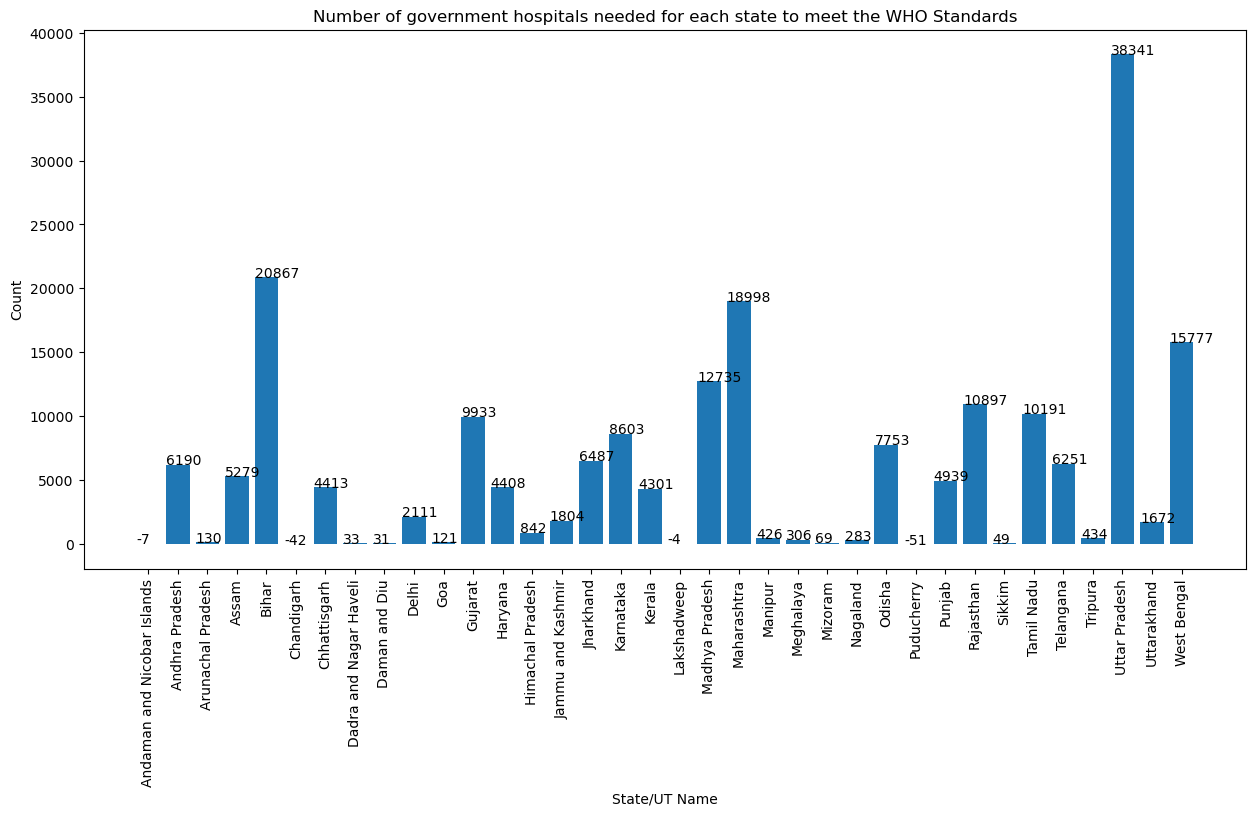

In [200]:
fig, ax = plt.subplots(figsize = (15,7))
plt.bar(x = state_hbeds_population.index[:-1], height = state_hbeds_population['div'][:-1]);
plt.xticks(rotation = 90);
plt.title('Number of government hospitals needed for each state to meet the WHO Standards');
plt.xlabel('State/UT Name');
plt.ylabel('Count');
for bar in ax.patches:
    x = bar.get_x()
    y = bar.get_height()
    ax.annotate(y, (x,y))